# Who are they?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Gay_Pride_Flag.svg/1024px-Gay_Pride_Flag.svg.png" alt="Drawing" style="width: 1500px; height:150px"/>

In [1]:
from IPython.display import Markdown, display

In [2]:
def content(text):
    """ This function allows you to output content """
    my_response = "<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'> \
    <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif; \
    font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>"+ text + "</span></div>"
    display(Markdown(my_response))

In [234]:
content(
    "This notebook explores the '2020 Kaggle Machine Learning & Data Science Survey' with a special focus " +
    "on women and those who choose not to describe themself as man or woman. Notably, there is a difference " +
    "between the words 'SEX' and 'GENDER'. While the former refers to biological attributes, the latter " +
    "refers to socially constructed roles, behaviours, expressions and identities. " + "\n\n" +
    "Through this notebook, I hope to introduce myself to the world of Data Visualization and " +
    "Interpretation. Please consider giving an UPVOTE if you like it. Comment and let me know what you think!"
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>This notebook explores the '2020 Kaggle Machine Learning & Data Science Survey' with a special focus on women and those who choose not to describe themself as man or woman. Notably, there is a difference between the words 'SEX' and 'GENDER'. While the former refers to biological attributes, the latter refers to socially constructed roles, behaviours, expressions and identities. 

Through this notebook, I hope to introduce myself to the world of Data Visualization and Interpretation. Please consider giving an UPVOTE if you like it. Comment and let me know what you think!</span></div>

In [4]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data wrangling

# Plotting
import matplotlib.pyplot as plt 
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style = "whitegrid")
import squarify
import folium
import itertools 
from matplotlib import cm
from math import log10
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv("kaggle_survey_2020_responses.csv")

/home/akshitbhalla/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# What is your gender?

In [6]:
content(
    "How does gender influence the decisions the Data Science and Machine Learning community makes? \
    Let's find out! But first, let's have a look at the proportion of participants we are interested in."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>How does gender influence the decisions the Data Science and Machine Learning community makes?     Let's find out! But first, let's have a look at the proportion of participants we are interested in.</span></div>

In [7]:
gender = data.loc[1:, "Q2"].value_counts()
categories = list(gender.keys())
palette = sns.color_palette("Set2", len(categories)) 
colors1 = {k:v for k,v in zip(categories, palette)}
colors2 = {k:v for k,v in zip(categories[:2] + ["Others"], palette[:2] + [(1, 0, 0)])}
colors3 = {k:v for k,v in zip(categories[2:], palette[2:])}

In [8]:
gen1 = gender.to_frame()
gen1.loc["others"] =  gen1[2:].sum()
gen1 = gen1.drop(categories[2:])
gen1["Q2"] = gen1["Q2"]/gen1["Q2"].sum() * 100

gen2 = gender.to_frame()
gen2["Q2"] = gen2["Q2"]/gen2["Q2"].sum() * 100
gen2 = gen2.drop(categories[:2])

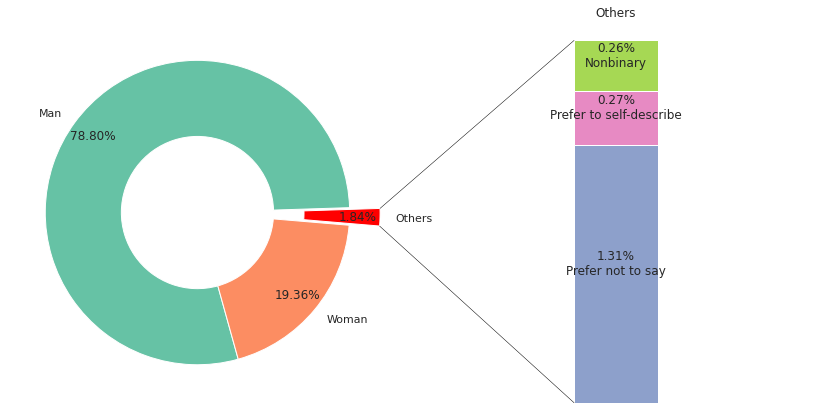

In [9]:
# make figure and assign axis objects
fig = plt.figure(figsize = (15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace = 0)

# pie chart parameters
ratios = gen1["Q2"].values
labels = colors2.keys() 
explode = [0, 0, 0.2]
angle = ratios[-1]

ax1.pie(
    ratios, 
    autopct = "%1.2f%%", 
    startangle = angle,
    labels = labels, 
    explode = explode,
    colors = colors2.values(), 
    pctdistance = 0.85,
    wedgeprops = dict(width = 0.5)
)

# bar chart parameters
xpos = 0
bottom = 0
ratios = gen2["Q2"].values
width = .2

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom = bottom, color = palette[2:][j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(
        xpos, ypos, 
        "%.2f%%" % (ax2.patches[j].get_height()) + "\n" + categories[2:][j], 
        ha  = "center"
    )

ax2.set_title("Others")
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = ax1.patches[-1].theta1, ax1.patches[-1].theta2
center, r = ax1.patches[-1].center, ax1.patches[-1].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]

con = ConnectionPatch(
    xyA = (-width / 2, bar_height), 
    coordsA = ax2.transData,
    xyB = (x, y), 
    coordsB = ax1.transData
)
con.set_color([0, 0, 0])
con.set_linewidth(0.5)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]

con = ConnectionPatch(
    xyA = (-width / 2, 0), 
    coordsA = ax2.transData,
    xyB = (x, y), 
    coordsB = ax1.transData
)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(0.5)

plt.show()

In [10]:
content(
    "Clearly, we are looking at a minority. 'Woman' makes up 19.36% while 'Prefer not to say',\
    'Prefer to self-describe' and 'Nonbinary' make up only 1.31%, 0.27% and 0.26% of the participants \
    respectively."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Clearly, we are looking at a minority. 'Woman' makes up 19.36% while 'Prefer not to say',    'Prefer to self-describe' and 'Nonbinary' make up only 1.31%, 0.27% and 0.26% of the participants     respectively.</span></div>

# In which country do you currently reside?

In [11]:
content(
    "Now let's have a look at which countries the participants belong to. Feel free to play around " +
    "with the layering option at the right top corner to better understand the gender distribution over the " +
    "world map. By hovering over the countries you will be able to see thier names. Click the points to see " +
    "more information including the count of people. The geo-coordinates do not represent the exact" +  
    "location of the participant."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Now let's have a look at which countries the participants belong to. Feel free to play around with the layering option at the right top corner to better understand the gender distribution over the world map. By hovering over the countries you will be able to see thier names. Click the points to see more information including the count of people. The geo-coordinates do not represent the exactlocation of the participant.</span></div>

In [12]:
df = data.loc[1:, ["Q2", "Q3"]]

df = df[df["Q3"] != "Other"]

df = df.rename(columns = {
    "Q2": "gender",
    "Q3": "country"
})

df["country"] = df["country"].replace({
    "Iran, Islamic Republic of...": "Iran, Islamic Republic of",
    "Republic of Korea": "South Korea",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "United States of America": "United States",
})

temp = df.groupby(["country", "gender"]).size().reset_index(name = "count")

link = "https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv"
coordinates = pd.read_csv(link)

coordinates = coordinates.drop(columns = ["Alpha-2 code", "Alpha-3 code", "Numeric code"])

coordinates = coordinates.rename(columns = {
    "Latitude (average)": "latitude", 
    "Longitude (average)": "longitude",
    "Country": "country"
})

coordinates["latitude"] = coordinates["latitude"].str.replace('"', '').astype(float)
coordinates["longitude"] = coordinates["longitude"].str.replace('"', '').astype(float)

temp = pd.merge(temp, coordinates)

temp["latitude"] = temp["latitude"].astype(float) + np.random.normal(0, 1, temp.shape[0])
temp["longitude"] = temp["longitude"].astype(float) + np.random.normal(0, 1, temp.shape[0])

max_bubble_size = 30
temp["count_size"] = temp["count"]/max(temp["count"]) * max_bubble_size

In [13]:
def MakeMap(temp, fg):
    mycolors = {
        "Man": "yellow",
        "Woman": "orange" ,
        "Prefer not to say": "blue",
        "Prefer to self-describe": "red",
        "Nonbinary": "green"
    } 
    
    for i, row in temp.iterrows():
        mycolor = mycolors[row["gender"]]

        html = "{} <br> {} <br> {}".format(row["country"], row["gender"], row["count"])
        iframe = folium.IFrame(
            html,
            width = 180,
            height = 80
        )

        popup = folium.Popup(
            iframe,
            max_width = 180
        )
    
        fg.add_child(
            folium.CircleMarker(
                location = (row["latitude"], row["longitude"]),
                radius = row["count_size"] + 0.05, 
                color = mycolor,
                fill = True,
                fill_color = mycolor,
                fill_opacity = 0.3,
                popup = popup,
                tooltip = row["country"]
            )
        )
    
    return fg

In [14]:
folium_map = folium.Map(
    location = [46.2276, 2.2137], # Center of earth coordinates
    zoom_start = 2.45,
#     tiles = "CartoDB dark_matter"
)

for c in categories:
    fg = MakeMap(
        temp[temp["gender"] == c], 
        folium.FeatureGroup(name = c)
    )

    folium_map.add_child(fg)

In [15]:
folium_map.add_child(folium.LayerControl())

In [16]:
content(
    "Evidently, a great deal of participants come from India and Europe. Smaller concentrations can be " +
    "found in the US, Asian countries like China, and Africa. 'Woman' (orange) mostly come from India. " + 
    "This is evident even in the Kaggle Grand-Masters list (Go India!!). India is followed by the US and " +
    "European countries. 'Prefer not to say' (blue) and 'Prefer to self describe' (red) follow the same " +
    "pattern. 'Nonbinary' (green) appear to be scattered all around the globe. Let's study the trends by " + 
    "continent."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Evidently, a great deal of participants come from India and Europe. Smaller concentrations can be found in the US, Asian countries like China, and Africa. 'Woman' (orange) mostly come from India. This is evident even in the Kaggle Grand-Masters list (Go India!!). India is followed by the US and European countries. 'Prefer not to say' (blue) and 'Prefer to self describe' (red) follow the same pattern. 'Nonbinary' (green) appear to be scattered all around the globe. Let's study the trends by continent.</span></div>

In [17]:
link = "https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv"
continents = pd.read_csv(link)

continents = continents.rename(columns = {
    "Continent": "continent",
    "Country": "country"
})

continents["country"] = continents["country"].replace({
    "Iran": "Iran, Islamic Republic of",
    "Russian Federation": "Russia",
    "Korea, South": "South Korea",
    "Vietnam": "Viet Nam"
})

temp = pd.merge(df, continents, how = "left")

temp["gender"] = pd.Categorical(temp["gender"])

temp.loc[temp["country"] == "United States", "continent"] = "North America"
temp.loc[temp["country"] == "Taiwan", "continent"] = "Asia"

temp = temp.drop(columns = ["country"])

temp = temp.groupby(
    ["continent", "gender"]
).agg(
    count = pd.NamedAgg("gender", "count")
).reset_index()  

temp["normal_gender_count"] = temp.groupby(["gender"])["count"].transform(lambda x: x/x.sum() * 100)

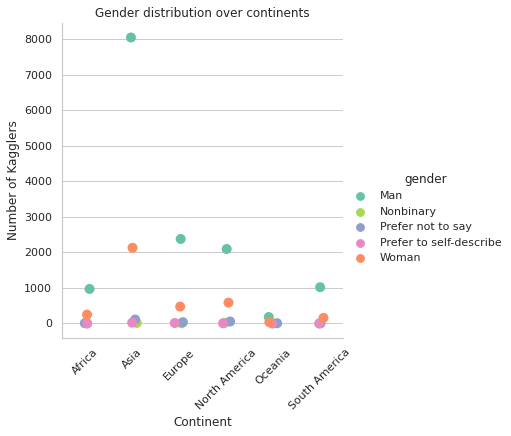

In [18]:
sns.catplot(
    x = "continent", 
    y = "count", 
    hue = "gender", 
    data = temp, 
    palette = colors1,
    s = 10,
    jitter = True
)
plt.xlabel("Continent")
plt.ylabel("Number of Kagglers")
plt.xticks(rotation = 45)
plt.title("Gender distribution over continents")
plt.show()

In [19]:
content(
    "There are too few people to look at so normalizing the data by gender appears to be a good idea."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>There are too few people to look at so normalizing the data by gender appears to be a good idea.</span></div>

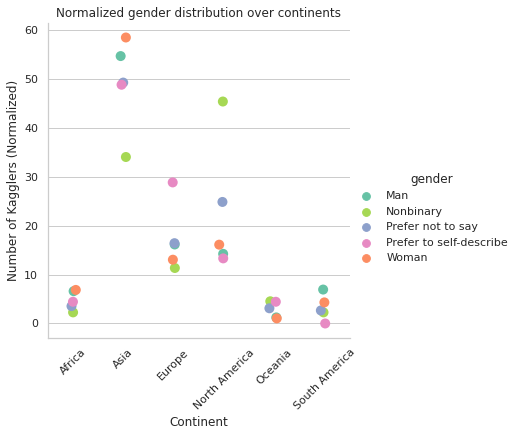

In [20]:
sns.catplot(
    x = "continent", 
    y = "normal_gender_count", 
    hue = "gender", 
    data = temp, 
    palette = colors1,
    s = 10,
    jitter = True
)
plt.xlabel("Continent")
plt.ylabel("Number of Kagglers (Normalized)")
plt.xticks(rotation = 45)
plt.title("Normalized gender distribution over continents")
plt.show()

In [21]:
content(
    "By normalizing, we reduce the effect of unequally surveyed gender groups. What do we observe? " + 
    "In Africa, Oceania and South America, the normalized number of participants is nearly the same. " + 
    "This means that gender does not affect participation much. In Asia, participation from 'Nonbinary' " + 
    "category is relatively smaller. In North America, participation from 'Nonbinary' category is " + 
    "relatively higher. In Europe, participation from 'Prefer to self describe' category is relatively " +
    "higher."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>By normalizing, we reduce the effect of unequally surveyed gender groups. What do we observe? In Africa, Oceania and South America, the normalized number of participants is nearly the same. This means that gender does not affect participation much. In Asia, participation from 'Nonbinary' category is relatively smaller. In North America, participation from 'Nonbinary' category is relatively higher. In Europe, participation from 'Prefer to self describe' category is relatively higher.</span></div>

# What is your age (# years)?

In [22]:
content(
    "How does age affect the participation of people belonging to different gender categories? Let's find out."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>How does age affect the participation of people belonging to different gender categories? Let's find out.</span></div>

Text(0.5, 1.0, 'Gender distribution over age group')

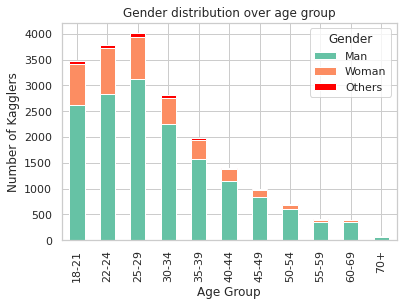

In [23]:
temp = data.loc[1:, ["Q1", "Q2"]]

temp = temp.rename(columns = {
    "Q1": "age",
    "Q2": "gender"
})

df = temp.pivot_table(
    index = "age", 
    columns = "gender", 
    aggfunc = {
        "gender": "count"
    },
    fill_value = 0
)

df.columns = df.columns.droplevel(0)
df.columns.name = "Gender"

df["Others"] = df[categories[2]] + df[categories[3]] + df[categories[4]]

df.drop(columns = categories[2:]).plot(
    kind = 'bar', 
    stacked = True, 
    color = colors2
)
plt.xlabel("Age Group")
plt.ylabel("Number of Kagglers")
plt.title("Gender distribution over age group")

In [24]:
content(
    "This histogram makes it clear that we are looking at an extremely small group of people. " +
    "It encourages us to normalize the effect of  unequally surveyed gender groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>This histogram makes it clear that we are looking at an extremely small group of people. It encourages us to normalize the effect of  unequally surveyed gender groups.</span></div>

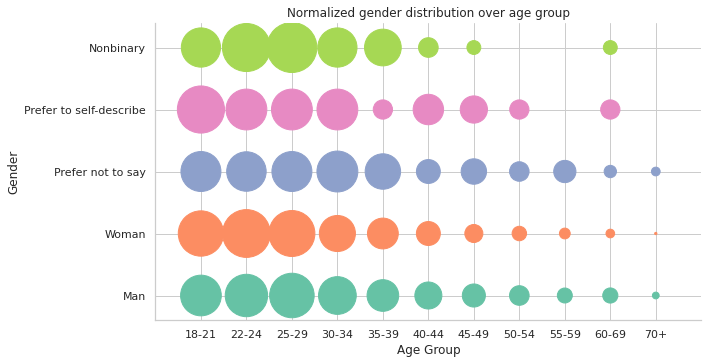

In [25]:
df = temp.groupby(["gender", "age"]).agg(
    count = pd.NamedAgg("age", "count")
).reset_index()

df["normal_gender_count"] = df.groupby(["gender"])["count"].transform(
    lambda x: x/x.sum() * 10000
)

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)
df = df.sort_values(["gender", "age"], ignore_index = True)

fg = sns.FacetGrid(
    data = df, 
    hue = 'gender',
    hue_order = categories,
    palette = "Set2", 
    height = 5, 
    aspect = 2
)
fg.map(plt.scatter, "age", "gender", "normal_gender_count")
plt.margins(0.1)
plt.xlabel("Age Group")
plt.ylabel("Gender")
plt.title("Normalized gender distribution over age group")
plt.show()

In [26]:
content(
    "Clearly, the patterns of all 5 gender categories are quite similar. This is evedent by the sizes " +
    "of the circles. They appear to be the same size almost irrespective of gender group. There are minor " +
    "deviations from that pattern. For example, we don't have much data for 'Nonbinary' group after age 50 " +
    "while the proportion of 'Man' appears to be slightly larger by the end."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Clearly, the patterns of all 5 gender categories are quite similar. This is evedent by the sizes of the circles. They appear to be the same size almost irrespective of gender group. There are minor deviations from that pattern. For example, we don't have much data for 'Nonbinary' group after age 50 while the proportion of 'Man' appears to be slightly larger by the end.</span></div>

# What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

In [27]:
content(
    "Education level tells us a lot of things. Less educated people often have less access to resources " + 
    "and hence it is possible that we see lesser participation from them. Education affects a lot of other " +
    "factors as well. So let's find out the education levels of different gender groups." 
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Education level tells us a lot of things. Less educated people often have less access to resources and hence it is possible that we see lesser participation from them. Education affects a lot of other factors as well. So let's find out the education levels of different gender groups.</span></div>

In [28]:
df = data.loc[1:, ["Q2", "Q4"]]

df = df.rename(columns = {
    "Q2": "gender",
    "Q4": "education"
})

df["education"] = df["education"].replace({
    "Some college/university study without earning a bachelor’s degree": "College",
    "No formal education past high school": "High School"
})

df["gender"] = pd.Categorical(df["gender"])

order = [
    'High School',
    'College',
    'Bachelor’s degree',
    'Master’s degree',
    'Doctoral degree',
    'Professional degree',
    'I prefer not to answer'
]

df["education"] = pd.Categorical(
    df["education"],
    categories = order,
    ordered = True
)

df = df.groupby(["gender", "education"]).agg(
    count = pd.NamedAgg("gender", "count")
).reset_index()  

In [29]:
def GetRedBar(df, categories, col_name, xlabel):
    df["gender"] = pd.Categorical(
        df["gender"],
        categories = categories,
        ordered = True
    )

    plt.subplots(figsize = (25, 5))
    for i, cat in enumerate(categories):
        plt.subplot(1, 5, i+1)
    
        temp = df[df["gender"] == cat]
        values = temp["count"].values

        sns.barplot(
            x = col_name, 
            y = "count", 
            data = temp,
            palette =  ['grey' if (v < max(values)) else 'red' for v in values],
        )
    
        plt.xlabel(xlabel)
        plt.ylabel("Number of Kagglers")
        plt.xticks(rotation = 90)
        plt.title(cat)
    
    plt.tight_layout()

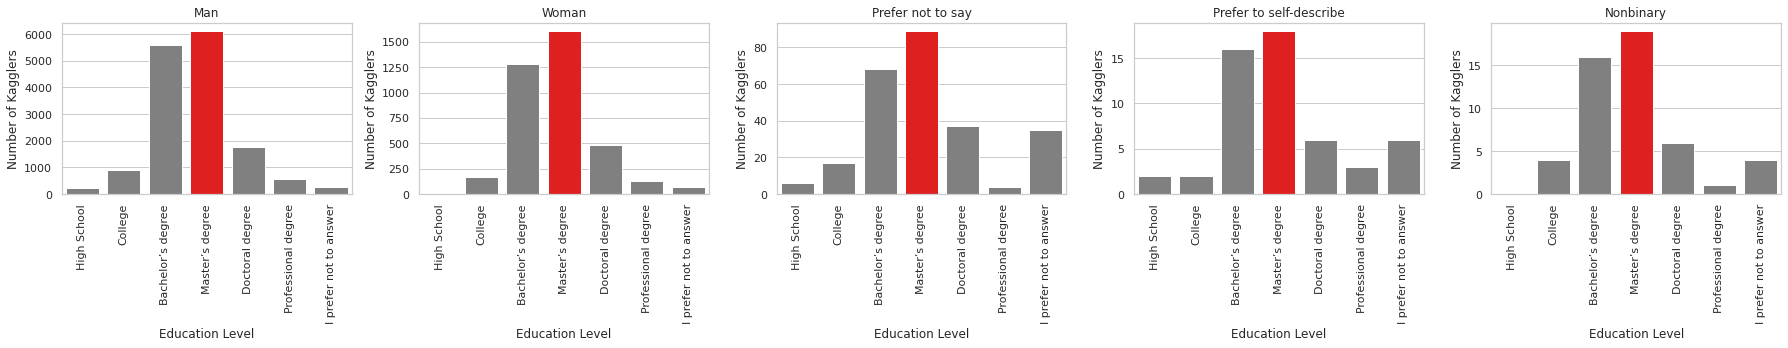

In [30]:
GetRedBar(df, categories, "education", "Education Level")

In [31]:
content(
    "In any gender category, the majority hold a masters degree. The bachelors degree " + 
    "appears to be the second highest followed by doctoral degree. So irrespective of gender, the "  +
    "participants appear to be well educated."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>In any gender category, the majority hold a masters degree. The bachelors degree appears to be the second highest followed by doctoral degree. So irrespective of gender, the participants appear to be well educated.</span></div>

# Select the title most similar to your current role (or most recent title if retired):

In [32]:
content(
    "Let's learn about the gender distribution for each role/title."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's learn about the gender distribution for each role/title.</span></div>

In [33]:
df = data.loc[1:, ["Q2", "Q5"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q5": "role"
})

df["gender"] = pd.Categorical(df["gender"])
df["role"] = pd.Categorical(df["role"])

df = df.groupby(["gender", "role"]).agg(
    count = pd.NamedAgg("role", "count")
).reset_index()

In [34]:
# sns.catplot(
#     x = "role", 
#     y = "count", 
#     hue = "gender", 
#     data = df, 
#     palette = colors1,
#     s = 10,
#     jitter = True
# )
# plt.xlabel("Role")
# plt.ylabel("Number of Kagglers")
# plt.xticks(rotation = 90)
# plt.title("Gender distribution over roles")
# plt.show()

In [35]:
temp = df.pivot_table(
    index = "role", 
    columns = "gender", 
    values = "count",
    fill_value = 0
)

# sns.heatmap(
#     temp,
#     annot = True,
#     cmap = "YlGnBu",
#     fmt = "g",
# )
# plt.xticks(rotation = 70)
# plt.title("Gender distribution over roles")
# plt.show()

In [36]:
df["normal_gender_count"] = df.groupby(["gender"])["count"].transform(lambda x: x/x.sum() * 100)

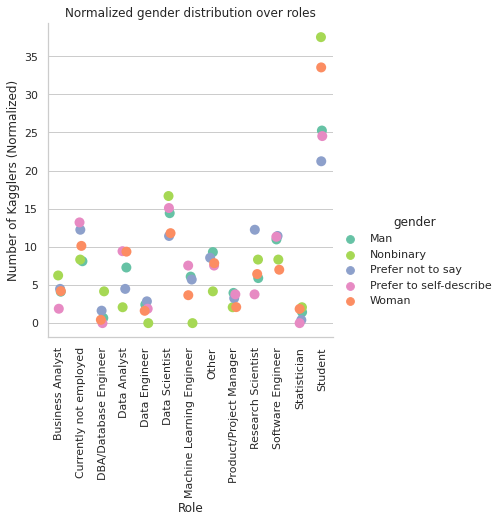

In [37]:
sns.catplot(
    x = "role", 
    y = "normal_gender_count", 
    hue = "gender", 
    data = df, 
    palette = colors1,
    s = 10,
    jitter = True
)
plt.xlabel("Role")
plt.ylabel("Number of Kagglers (Normalized)")
plt.xticks(rotation = 90)
plt.title("Normalized gender distribution over roles")
plt.show()

In [38]:
content(
    "This gender normalized plot tells an interesting story. The gender distribution almost always clusters " +
    "together, with the exception of the 'Student' category where there is a considerable amount of " +
    "variation. Clustering together shows that participation is near identical in each role, irrespective " +
    "of gender."
    
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>This gender normalized plot tells an interesting story. The gender distribution almost always clusters together, with the exception of the 'Student' category where there is a considerable amount of variation. Clustering together shows that participation is near identical in each role, irrespective of gender.</span></div>

In [39]:
temp = temp.apply(lambda x: x/x.sum() * 100)

In [40]:
# sns.heatmap(
#     temp,
#     annot = True,
#     cmap = "YlGnBu",
#     fmt = ".2f"
# )
# plt.xticks(rotation = 70)
# plt.title("Normalized gender distribution over roles")
# plt.show()

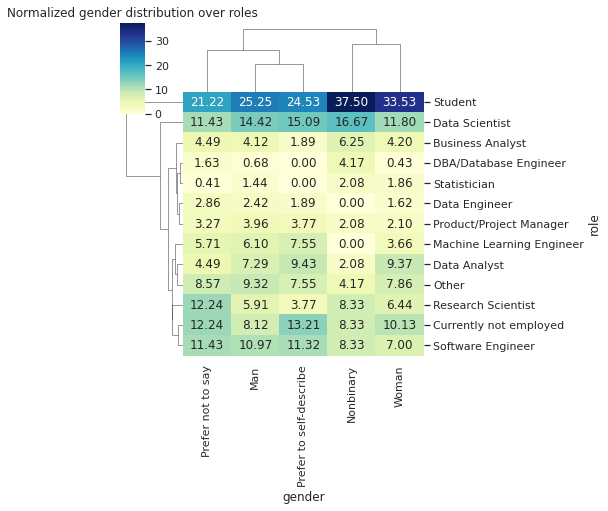

In [41]:
sns.clustermap(
    temp,
    annot = True,
    cmap = "YlGnBu",
    fmt = ".2f",
    figsize = (7, 7)
)
plt.title("Normalized gender distribution over roles")
plt.show()

In [42]:
content(
    "Look at the columns of this cluter map. They represent the gender groups. The color pattern of all " +
    "columns appears to be quite similar right? That shows how gender did not affect the roles much. " +
    "We must remember that these are normalized distributions. Drawing inferences from the absolute " +
    "distributions can be hard due to unequally surveyed gender groups. If we look at the cluster map more" +
    "closely, it tells us how similar the gender groups are to each other as well as the similarity " +
    "between various roles."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Look at the columns of this cluter map. They represent the gender groups. The color pattern of all columns appears to be quite similar right? That shows how gender did not affect the roles much. We must remember that these are normalized distributions. Drawing inferences from the absolute distributions can be hard due to unequally surveyed gender groups. If we look at the cluster map moreclosely, it tells us how similar the gender groups are to each other as well as the similarity between various roles.</span></div>

# For how many years have you been writing code and/or programming?

In [43]:
content(
    "Experience at coding tells us a lot of things. For example, it gives us insights into which groups " +
    "are presumably new to Data Science and Machine Learning or even Kaggle."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Experience at coding tells us a lot of things. For example, it gives us insights into which groups are presumably new to Data Science and Machine Learning or even Kaggle.</span></div>

In [44]:
df = data.loc[1:, ["Q2", "Q6"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q6": "experience"
})

df["experience"] = df["experience"].replace({
    'I have never written code': "Never"
})

df["gender"] = pd.Categorical(df["gender"])
df["experience"] = pd.Categorical(
    df["experience"],
    categories = [
        'Never',
        '< 1 years',
        '1-2 years',
        '3-5 years',
        '5-10 years',
        '10-20 years',
        '20+ years'
    ],
    ordered = True
)

df = df.groupby(["gender", "experience"]).agg(
    count = pd.NamedAgg("experience", "count")
).reset_index()

df = df.pivot_table(
    index = "experience", 
    columns = "gender", 
    values = "count",
    fill_value = 0
)

df = df.apply(lambda x: x/x.sum() * 100)

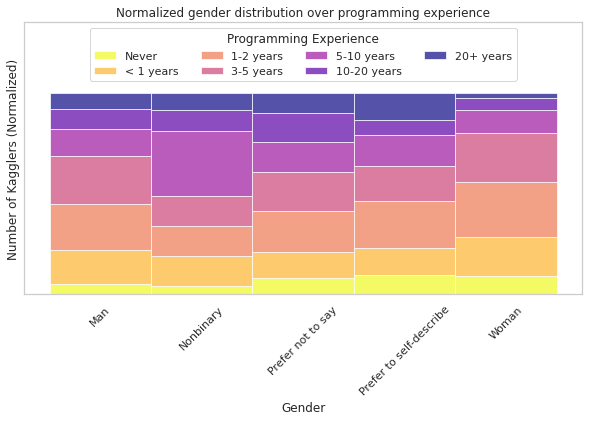

In [45]:
df.T.plot(
    kind = "bar",
    stacked = True,
    figsize = (10, 5),
    colormap = "plasma_r",
    width = 1,
    alpha = 0.7
)
plt.ylim(0, 135)
plt.xticks(rotation = 45)
plt.yticks([])
plt.xlabel("Gender")
plt.ylabel("Number of Kagglers (Normalized)")
plt.title("Normalized gender distribution over programming experience")
plt.legend(ncol = 4, loc = "upper center", title = "Programming Experience")

ax = plt.gca()
ax.grid(False)

In [46]:
content(
    "The near identical widths of any category (of programming experience) in all gender groups tells us how" +
    "similar the gender groups are. Although there is a minor devation in the case of 'Nonbinary' people " +
    "(whose 5-10 years category is much larger than other gender groups), the patterns are otherwise similar"
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>The near identical widths of any category (of programming experience) in all gender groups tells us howsimilar the gender groups are. Although there is a minor devation in the case of 'Nonbinary' people (whose 5-10 years category is much larger than other gender groups), the patterns are otherwise similar</span></div>

# What programming languages do you use on a regular basis? (Select all that apply)

In [47]:
content(
    "Let's see the programming language preferences amongst the different gender groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's see the programming language preferences amongst the different gender groups.</span></div>

In [48]:
def GenderPiePlot(df, categories, cols):
    df[df[cols].notnull()] = 1
    df = df.fillna(0)
    
    df = df.groupby(["gender"]).sum()
    
    temp = df.apply(lambda x: x/x.sum(), axis = 1)
    
    for i, cat in enumerate(categories):
        plt.subplot(2, 3, i+1)
        temp.loc[cat, :].plot(
            kind = "pie",
            explode = [0.1]*len(cols),   
            autopct = "%1.2f%%", 
            pctdistance = 0.6,
            wedgeprops = dict(width = 0.5),
            colormap = "plasma_r",
            figsize = (20, 10),
        )
        plt.ylabel("")
        plt.xlabel(cat)
    
    plt.tight_layout()
    
    return temp, df

In [49]:
def GenderScatterPlot(temp, categories):
    pca = PCA(n_components = 2)
    embeddings = pca.fit_transform(temp.values)
    variances = pca.explained_variance_ratio_
    print(variances.cumsum())
    
    embeddings = pd.DataFrame(embeddings, index = categories, columns = ["PC1", "PC2"])
    embeddings.index.name = "gender"
    embeddings = embeddings.apply(lambda x: x/np.sqrt(np.sum(x**2)), axis = 1)
    embeddings = embeddings.reset_index()
    
    plt.figure(figsize = (5, 5))
    sns.scatterplot(
        x = "PC1", 
        y = "PC2",
        hue = "gender",
        data = embeddings,
        hue_order = categories,
        palette = "Set2", 
        s = 100,
        legend = False,
        x_jitter = True,
        y_jitter = True,
    )
    
    for i, txt in enumerate(categories):
        plt.annotate(txt, (embeddings.loc[i, "PC1"], embeddings.loc[i, "PC2"]))
        
    plt.title("Clustering gender")
    plt.xlim(-1.2, 1.6)
    plt.show()

In [50]:
def CategoryPiePlot(df, categories, cols, nrow, ncol):
    dummy = df.drop(categories[2:])
    dummy.loc["Other", :] = df.loc[categories[2:], :].sum()
    dummy = dummy.apply(lambda x: x/x.sum())

    for i, c in enumerate(cols):
        plt.subplot(nrow, ncol, i+1)
    
        dummy.loc[:, c].plot(
            kind = "pie",
            explode = [0.1]*3,   
            autopct = "%1.2f%%", 
            pctdistance = 0.7,
            wedgeprops = dict(width = 0.5),
            colormap = "plasma",
            figsize = (20, 10)
        )
        plt.ylabel("")
        plt.xlabel(c)
    
    plt.tight_layout()

In [51]:
def CategoryScatterPlot(df, cols, typ):
    temp = df.apply(lambda x: x/x.sum(), axis = 0)
    
    pca = PCA(n_components = 2)
    embeddings = pca.fit_transform(temp.T.values)
    variances = pca.explained_variance_ratio_
    print(variances.cumsum())
    
    embeddings = pd.DataFrame(embeddings, index = cols, columns = ["PC1", "PC2"])
    embeddings.index.name = typ
    embeddings = embeddings.apply(lambda x: x/np.sqrt(np.sum(x**2)), axis = 1)
    embeddings = embeddings.reset_index()
    
    plt.figure(figsize = (5, 5))
    sns.scatterplot(
        x = "PC1", 
        y = "PC2",
        hue = typ,
        data = embeddings,
        s = 100,
        legend = False,
        x_jitter = True,
        y_jitter = True,
    )
    for i, txt in enumerate(cols):
        plt.annotate(txt, (embeddings.loc[i, "PC1"], embeddings.loc[i, "PC2"]))
        
    plt.title("Clustering " + typ)
    plt.xlim(-1.2, 2)
    plt.show()

In [52]:
q_cols = [
    'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8',
    'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'
]
df = data.loc[1:, ["Q2"] + q_cols]

prog_lang = [
    "Python", "R", "SQL", "C", "C++", "Java", "Javascript", "Julia", "Swift", "Bash", "MATLAB", "None", 
    "Other"
]
df.columns = ["gender"] + prog_lang

/home/akshitbhalla/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/home/akshitbhalla/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/home/akshitbhalla/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None do

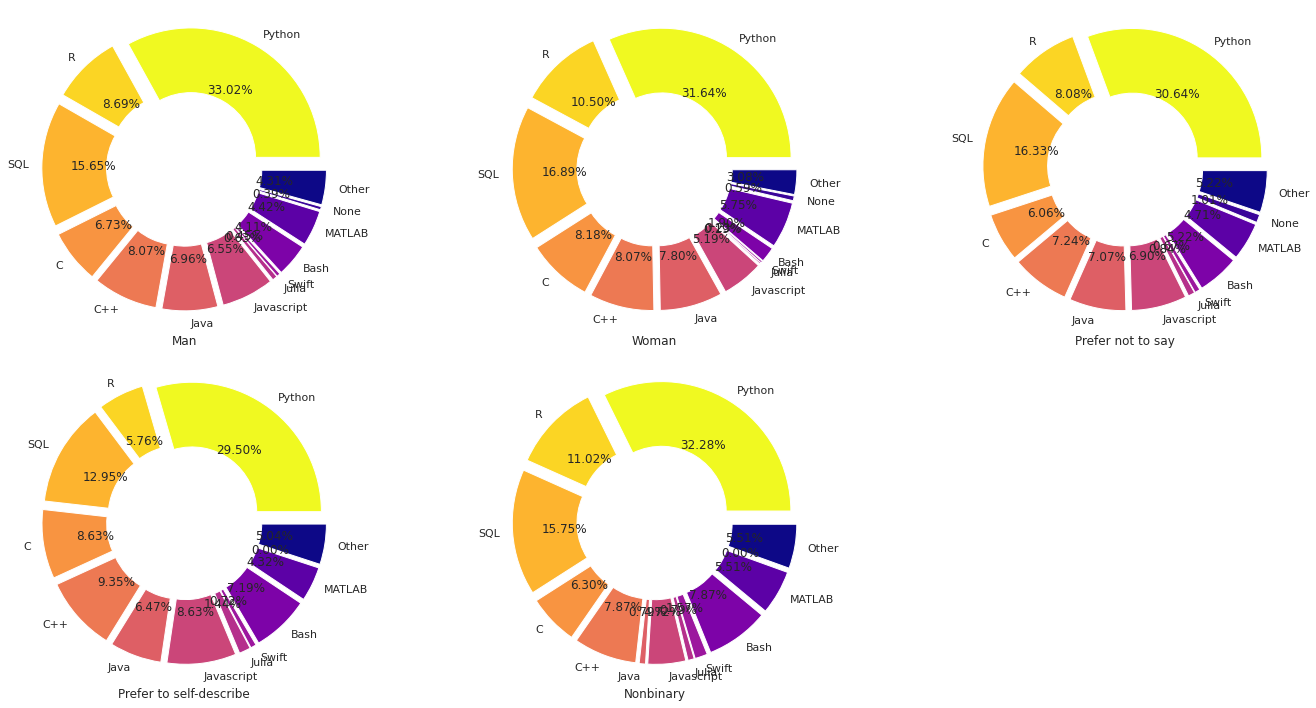

In [53]:
temp, df = GenderPiePlot(df, categories, prog_lang)

In [54]:
content(
    "The pie charts appear to be similar in any age category. Python is the favourite language of all, " +
    "irrespective of gender. SQL and R programming languages follow."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>The pie charts appear to be similar in any age category. Python is the favourite language of all, irrespective of gender. SQL and R programming languages follow.</span></div>

[0.47855133 0.90021403]


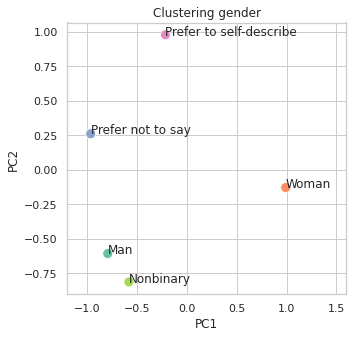

In [55]:
GenderScatterPlot(temp, categories)

In [56]:
content(
    "In terms of programming language preferences, 'Man' and 'Nonbinary' appear to be most similar."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>In terms of programming language preferences, 'Man' and 'Nonbinary' appear to be most similar.</span></div>

/home/akshitbhalla/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


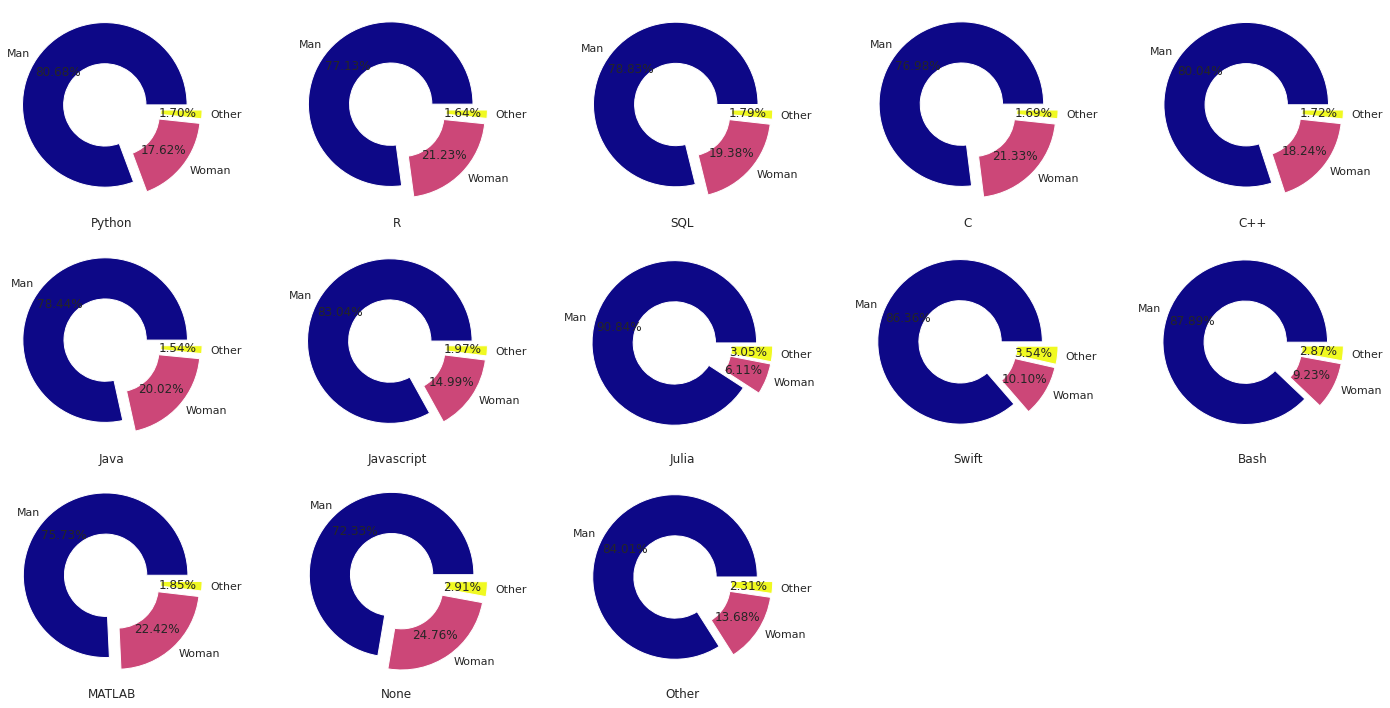

In [57]:
CategoryPiePlot(df, categories, prog_lang, 3, 5)

In [58]:
content(
    "Amongst all people who like Python, most are 'Man' followed by 'Woman'. This is unsurprising as we " +
    "are interested in a small group of people here."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Amongst all people who like Python, most are 'Man' followed by 'Woman'. This is unsurprising as we are interested in a small group of people here.</span></div>

[0.99247782 0.99909575]


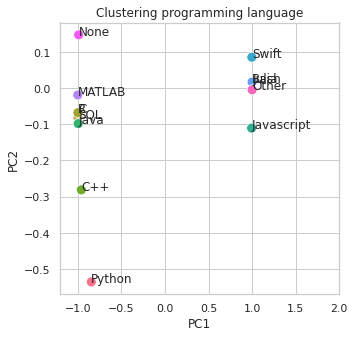

In [59]:
CategoryScatterPlot(df, prog_lang, "programming language")

In [60]:
content(
    "In terms of gender, Python is unlike any other language. I'm a Python fan btw. :D"
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>In terms of gender, Python is unlike any other language. I'm a Python fan btw. :D</span></div>

# What programming language would you recommend an aspiring data scientist to learn first?

In [61]:
content(
    "We know the programming preferences of each gender group. Now let's see what people would recommend " +
    "other people."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>We know the programming preferences of each gender group. Now let's see what people would recommend other people.</span></div>

In [62]:
df = data.loc[1:, ["Q2", "Q8"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q8": "programming language"
})

df["gender"] = pd.Categorical(df["gender"])
df["programming language"] = pd.Categorical(df["programming language"])

df = df.groupby(["gender", "programming language"]).agg(
    count = pd.NamedAgg("programming language", "count")
).reset_index()

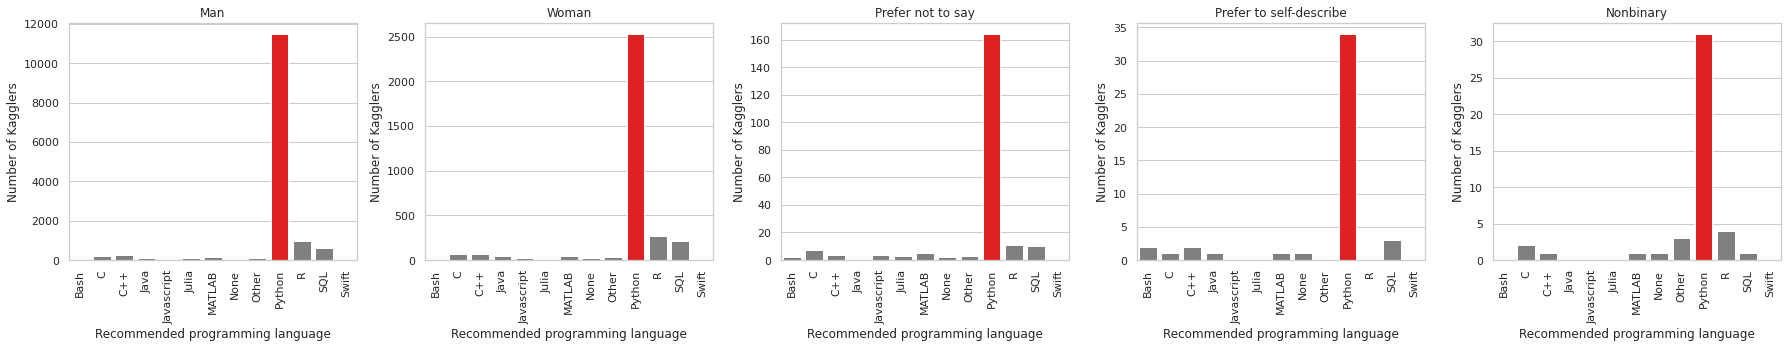

In [63]:
GetRedBar(df, categories, "programming language", "Recommended programming language")

In [64]:
content(
    "Python appears to be the winner in any case. Leading by a LOT."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Python appears to be the winner in any case. Leading by a LOT.</span></div>

# Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply)

In [65]:
content(
    "Let's now look at the IDEs used regularly by different gender groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's now look at the IDEs used regularly by different gender groups.</span></div>

/home/akshitbhalla/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/home/akshitbhalla/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/home/akshitbhalla/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None do

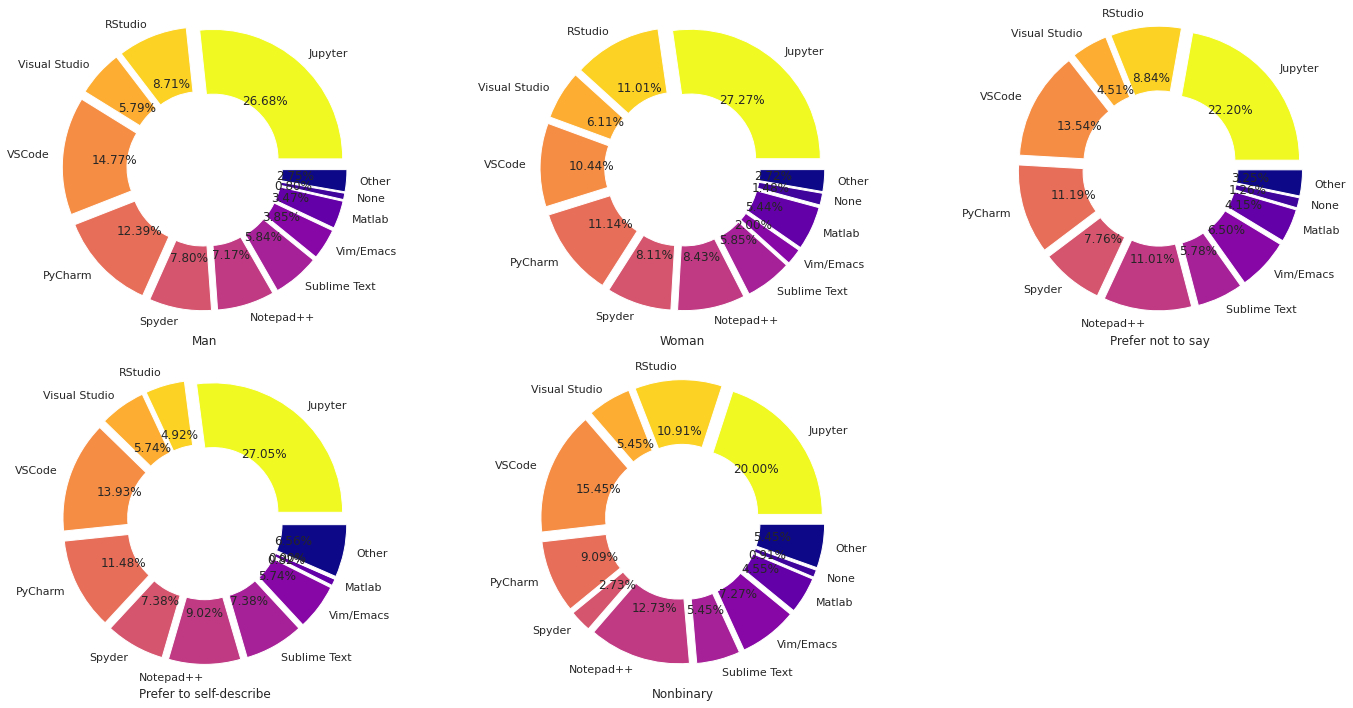

In [66]:
ide_cols = [
    'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 
    'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_11', 'Q9_OTHER'
]

df = data.loc[1:, ["Q2"] + ide_cols]

ide = [
    "Jupyter", "RStudio", "Visual Studio", "VSCode", "PyCharm", "Spyder", "Notepad++", 
    "Sublime Text", "Vim/Emacs", "Matlab", "None", "Other"
]
df.columns = ["gender"] + ide

temp, df = GenderPiePlot(df, categories, ide)

In [67]:
content(
    "The distributions appear to be identical irrespective of gender. Jupyter is the most popular choice " +
    "in any gender group. Other Python based IDEs such as VSCode and PyCharm follow."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>The distributions appear to be identical irrespective of gender. Jupyter is the most popular choice in any gender group. Other Python based IDEs such as VSCode and PyCharm follow.</span></div>

[0.58755753 0.88231594]


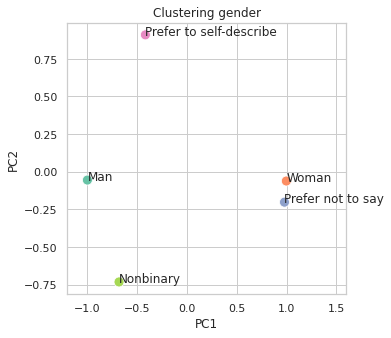

In [68]:
GenderScatterPlot(temp, categories)

In [69]:
content(
    "Considering IDE preferences, 'Woman' and 'Prefer not to say' appear to be most similar."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Considering IDE preferences, 'Woman' and 'Prefer not to say' appear to be most similar.</span></div>

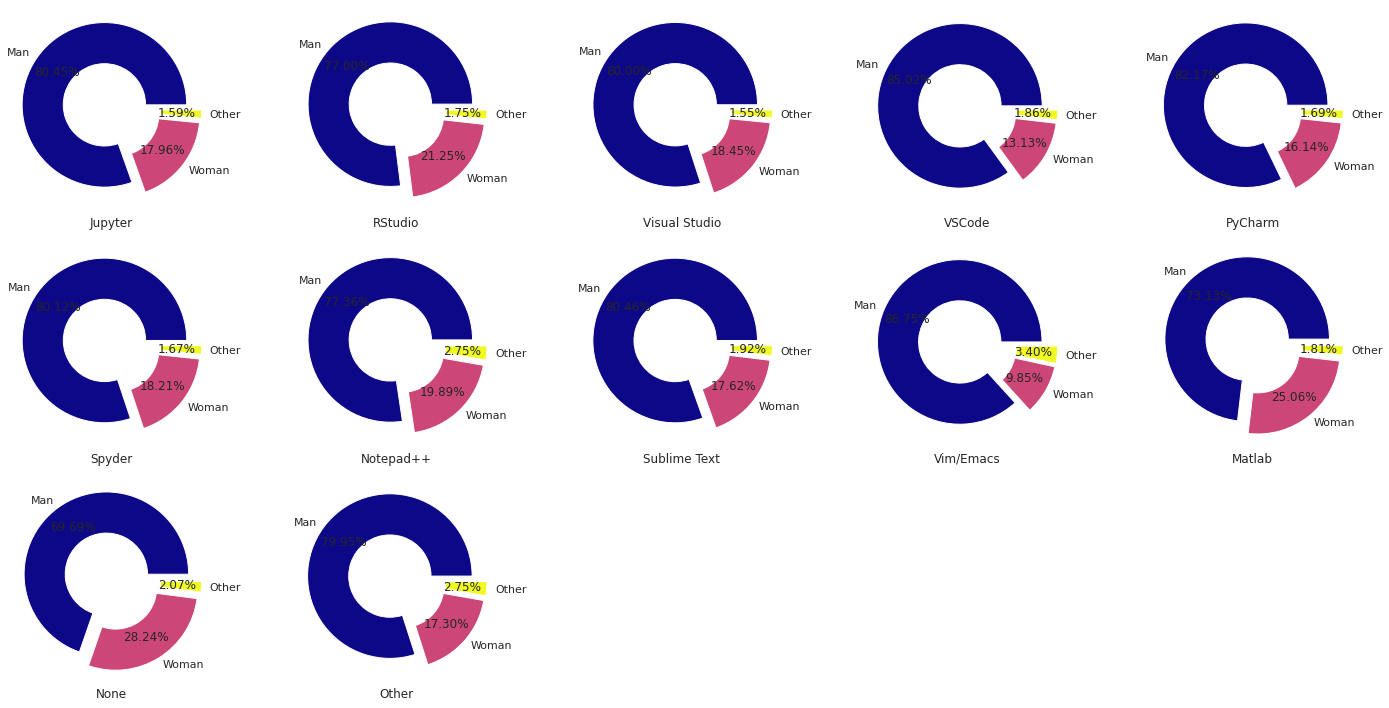

In [70]:
CategoryPiePlot(df, categories, ide, 3, 5)

In [71]:
content(
    "Again, these pie chart make it clear that we are interested in only about 2-3% of the total population."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Again, these pie chart make it clear that we are interested in only about 2-3% of the total population.</span></div>

[0.99243493 0.99932118]


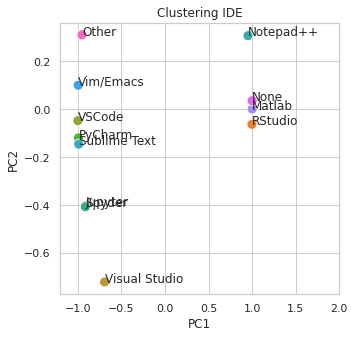

In [72]:
CategoryScatterPlot(df, ide, "IDE")

In [73]:
content(
    "Notice something interesting? In terms of gender, Python based IDE cluster together."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Notice something interesting? In terms of gender, Python based IDE cluster together.</span></div>

# Which of the following hosted notebook products do you use on a regular basis? (Select all that apply)

In [74]:
content(
    "We know that most people regularly use Jupyter, which offers notebooks. Let's explore the gender " +
    "distribution for each hosted notebook product"
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>We know that most people regularly use Jupyter, which offers notebooks. Let's explore the gender distribution for each hosted notebook product</span></div>

In [75]:
not_cols = [
    'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 
    'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13', 'Q10_OTHER'
]

df = data.loc[1:, ["Q2"] + not_cols]

notebook = [
    "Kaggle", "Colab", "Azure", "Paperspace/Gradient", "Binder/JupyterHub", "Code Ocean", "Watson Studio", 
    "Sagemaker", "Amazon EMR", "Google AI Notebooks", "Datalab Notebooks",  "Databricks", "None", "Other"
]
df.columns = ["gender"] + notebook

df[df[notebook].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
temp = df.apply(lambda x: x/x.sum(), axis = 1)

In [239]:
plt.figure(figsize = (10, 5))
for i, c in enumerate(categories):
    (markerline, stemlines, baseline) = plt.stem(
        temp.columns,
        temp.loc[c]
    )
    plt.setp(
        markerline, 
        marker = 'o', 
        markersize = 15,
        markeredgewidth = 2, 
        color = palette[i]
    )
    plt.setp(stemlines, color = "gold")
    plt.setp(baseline, visible = False)
    plt.tick_params(labelsize = 12)
    plt.xticks(rotation = 45)
    
    plt.xlabel("Preferred Notebook")
    plt.ylabel("Number of Kagglers (Normalized)")
    plt.title("Gender distribution over notebook preference.")
    
plt.tight_layout()

KeyError: 'Man'

<Figure size 720x360 with 0 Axes>

In [77]:
content(
    "Again, the gender groups cluster together in each category. It can be said that Kaggle and Colab are " +
    "popular platforms. A lot of people (in any gender group) do not like any."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Again, the gender groups cluster together in each category. It can be said that Kaggle and Colab are popular platforms. A lot of people (in any gender group) do not like any.</span></div>

# What type of computing platform do you use most often for your data science projects?

In [78]:
content(
    "Computing platforms are important for data scientists and machine learning engineers. Let's explore " +
    "people's preferences."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Computing platforms are important for data scientists and machine learning engineers. Let's explore people's preferences.</span></div>

In [79]:
df = data.loc[1:, ["Q2", "Q11"]]

df = df.rename(columns = {
    "Q2": "gender",
    "Q11": "compute platform"
})

df["compute platform"] = df["compute platform"].replace({
    "A personal computer or laptop": "PC",
    "A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)": "DL Workstation",
    "A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)": "Cloud"
})

df = df.groupby(["gender", "compute platform"]).agg(
    count = pd.NamedAgg("gender", "count")
).reset_index()

df["normal_gender_count"] = df.groupby(["gender"])["count"].transform(
    lambda x: x/x.sum() * 5000
)

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)
df = df.sort_values(["gender", "compute platform"], ignore_index = True)

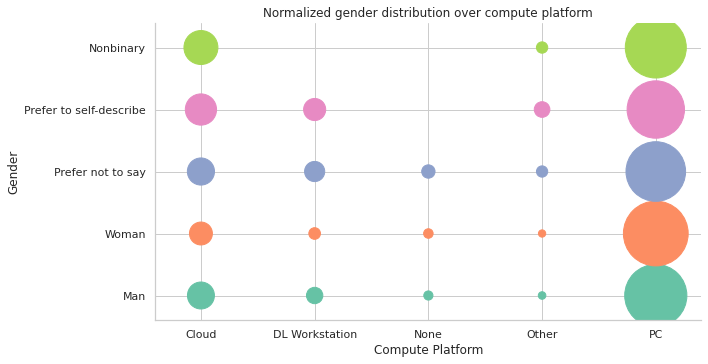

In [80]:
fg = sns.FacetGrid(
    data = df, 
    hue = 'gender',
    hue_order = categories,
    palette = "Set2", 
    height = 5, 
    aspect = 2
)
fg.map(plt.scatter, "compute platform", "gender", "normal_gender_count")
plt.margins(0.1)
plt.xlabel("Compute Platform")
plt.ylabel("Gender")
plt.title("Normalized gender distribution over compute platform")
plt.show()

In [81]:
content(
    "Irrespective of gender, the patterns appear to be quite similar. Most users prefer PC. This trend is " +
    "followed by Cloud users. Users of other computing platforms show similar trends. The absence of data " +
    "in the case of 'Nonbinary' and 'Prefer to self describe' categories is no reason to disconsider the " +
    "fact that the patterns are otherwise similar."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Irrespective of gender, the patterns appear to be quite similar. Most users prefer PC. This trend is followed by Cloud users. Users of other computing platforms show similar trends. The absence of data in the case of 'Nonbinary' and 'Prefer to self describe' categories is no reason to disconsider the fact that the patterns are otherwise similar.</span></div>

# Which types of specialized hardware do you use on a regular basis? (Select all that apply)

In [82]:
content(
    "Let's explore which hardware people of different gender groups like to use on a regular basis."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's explore which hardware people of different gender groups like to use on a regular basis.</span></div>

In [83]:
hard_cols = ['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_OTHER']
df = data.loc[1:, ["Q2"] + hard_cols]

hardware = ["GPU", "TPU", "None", "Other"]
df.columns = ["gender"] + hardware

df[df[hardware].notnull()] = 1
df = df.fillna(0)

temp = df.groupby(["gender"]).sum()

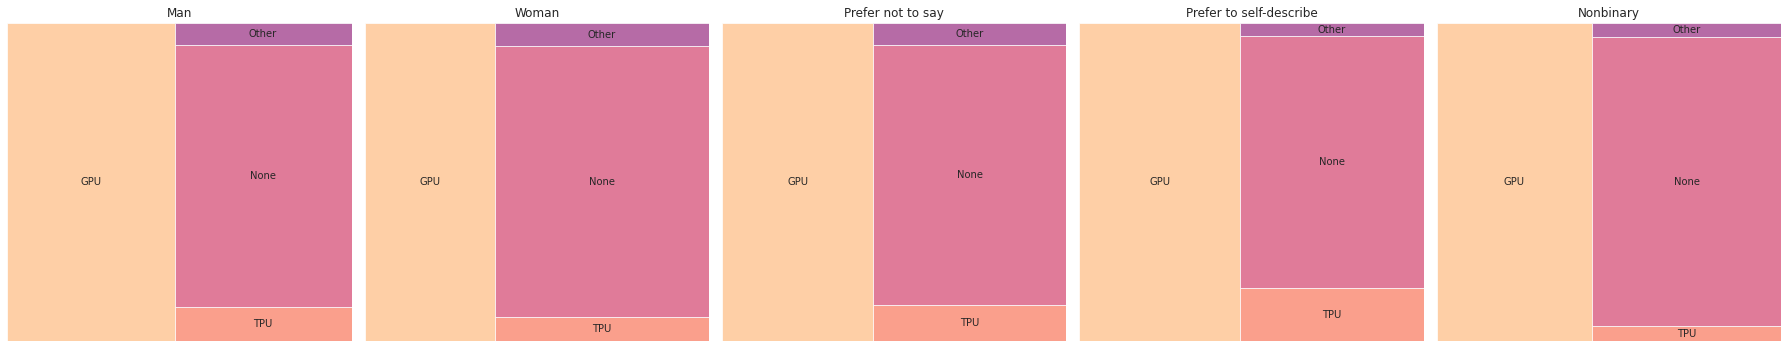

In [84]:
fig = plt.figure(figsize = (25,5)) 
gs = fig.add_gridspec(1, len(categories))

for i, cat in enumerate(categories):
    ax = fig.add_subplot(gs[0, i])
    
    squarify.plot(
        sizes = temp.loc[cat].values,  
        label = temp.loc[cat].keys(), 
        color = sns.color_palette("magma_r"),
        alpha = 0.7,
        text_kwargs = {
            "size": 10
        },
        ax = ax
    )
    ax.axis("off")
    ax.set_title(cat)
    
plt.tight_layout()

In [85]:
content(
    "In any gender group, the specialized hardware used on a regular basis is GPU. A lot of people use " + 
    "none. The distribution is quite similar in all the gender groups." 
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>In any gender group, the specialized hardware used on a regular basis is GPU. A lot of people use none. The distribution is quite similar in all the gender groups.</span></div>

# Approximately how many times have you used a TPU (tensor processing unit)?

In [86]:
content(
    "Although GPUs are the popular choice, we know how much better (mainly speed) TPUs can be. " +
    "TPUs are the future and it's interesting to explore how often people " +
    "use TPUs today, because the numbers are definitely going to shoot in the years to come."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Although GPUs are the popular choice, we know how much better (mainly speed) TPUs can be. TPUs are the future and it's interesting to explore how often people use TPUs today, because the numbers are definitely going to shoot in the years to come.</span></div>

In [87]:
df = data.loc[1:, ["Q2", "Q13"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q13": "frequency"
})

df["frequency"] = df["frequency"].replace({
    "More than 25 times": "> 25 times"
})

df["gender"] = pd.Categorical(df["gender"])

order = ["Never", "Once", "2-5 times", "6-25 times", "> 25 times"]
df["frequency"] = pd.Categorical(
    df["frequency"],
    categories = order,
    ordered = True
)

df = df.groupby(["gender", "frequency"]).agg(
    count = pd.NamedAgg("gender", "count")
).reset_index()

df["count"] = df["count"] + np.random.uniform(0, 1, df.shape[0])

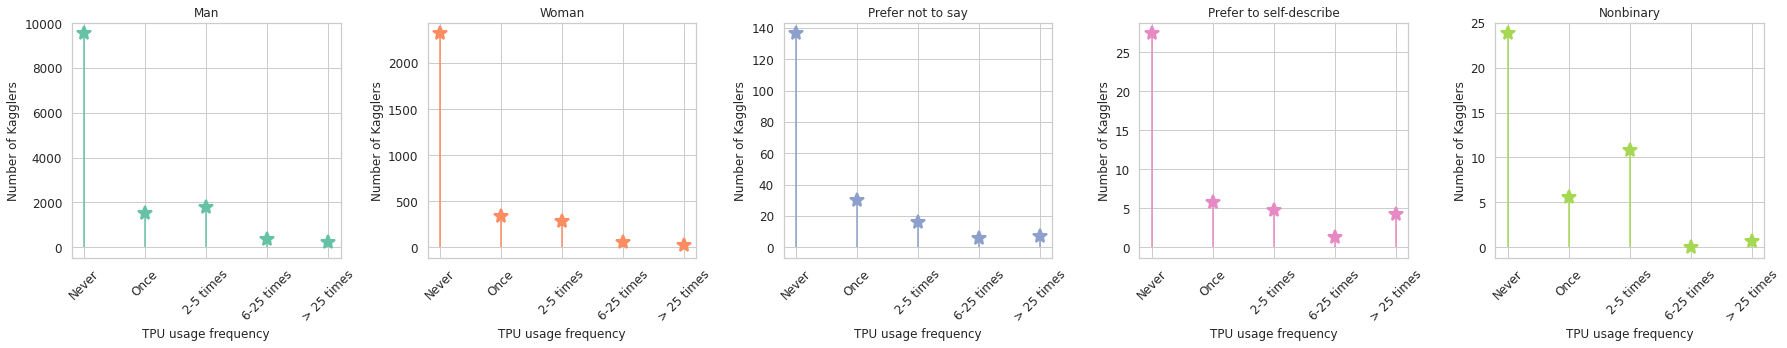

In [88]:
plt.subplots(figsize = (25, 5))
for i, c in enumerate(categories):
    plt.subplot(1, 5, i+1)
    (markerline, stemlines, baseline) = plt.stem(
        df[df["gender"] == c]["frequency"].values,
        df[df["gender"] == c]["count"].values, 
    )
    plt.setp(
        markerline, 
        marker = '*', 
        markersize = 15,
        markeredgewidth = 2, 
        color = palette[i]
    )
    plt.setp(stemlines, color = palette[i])
    plt.setp(baseline, visible = False)
    plt.tick_params(labelsize = 12)
    plt.xticks(rotation = 45)
    
    plt.xlabel("TPU usage frequency")
    plt.ylabel("Number of Kagglers")
    
    plt.title(c)
    
plt.tight_layout()

In [89]:
content(
    "Woah, yet again, the trends appear to be similar irrespective of gender. Most people have never used " +
    "a TPU. A small number of people have used it once and so on (fewer and fewer people). You may also " +
    "observe deviations. For example, for 'Prefer to self describe' and 'Nonbinary' categories, the  " +
    "trend is slightly off."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Woah, yet again, the trends appear to be similar irrespective of gender. Most people have never used a TPU. A small number of people have used it once and so on (fewer and fewer people). You may also observe deviations. For example, for 'Prefer to self describe' and 'Nonbinary' categories, the  trend is slightly off.</span></div>

# What data visualization libraries or tools do you use on a regular basis? (Select all that apply)

In [90]:
content(
    "Let's explore the data visualization libraries or tools people prefer."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's explore the data visualization libraries or tools people prefer.</span></div>

In [91]:
vis_cols = [
    'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 
    'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q14_OTHER'
]

df = data.loc[1:, ["Q2"] + vis_cols]

vis = [
    "Matplotlib", "Seaborn", "Plotly", "Ggplot", "Shiny", "D3 js", "Altair", "Bokeh", "Geoplotlib", 
    "Leaflet/Folium", "None", "Other"
]
df.columns = ["gender"] + vis

df[df[vis].notnull()] = 1
df = df.fillna(0)

df = df.groupby("gender").sum()

df = df.apply(lambda x: x/x.sum() * 100, axis = 1)

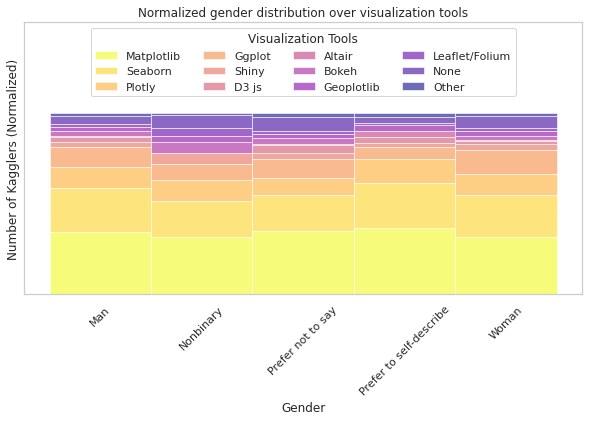

In [92]:
df.plot(
    kind = "bar",
    stacked = True,
    figsize = (10, 5),
    colormap = "plasma_r",
    width = 1,
    alpha = 0.6
)
plt.ylim(0, 150)
plt.xticks(rotation = 45)
plt.yticks([])
plt.xlabel("Gender")
plt.ylabel("Number of Kagglers (Normalized)")
plt.title("Normalized gender distribution over visualization tools")
plt.legend(ncol = 4, loc = "upper center", title = "Visualization Tools")

ax = plt.gca()
ax.grid(False)

In [93]:
content(
    "The trend is similar for all gender categories. We previously saw how much people love Python. Their " +
    "love for python based visualization libraries such as Matplotlib, Seaborn and Plotly is not " +
    "surprising. Capable of producing excellent quality graphics, R's Ggplot follows." 
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>The trend is similar for all gender categories. We previously saw how much people love Python. Their love for python based visualization libraries such as Matplotlib, Seaborn and Plotly is not surprising. Capable of producing excellent quality graphics, R's Ggplot follows.</span></div>

# For how many years have you used machine learning methods?

In [94]:
content(
    "Let's look at for how long people have been using ML."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's look at for how long people have been using ML.</span></div>

In [95]:
df = data.loc[1:, ["Q2", "Q15"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q15": "experience"
})

df["experience"] = df["experience"].replace({
    '20 or more years': "> 20 years",
    'I do not use machine learning methods': "Don't use ML"
})

df["gender"] = pd.Categorical(df["gender"])

order = [
    "Don't use ML", 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', 
    '10-20 years', "> 20 years"
]
df["experience"] = pd.Categorical(
    df["experience"],
    categories = order,
    ordered = True
)

df = df.pivot_table(
    index = "experience",
    columns = "gender",
    aggfunc = {
        "gender": "count"
    },
    fill_value = 0
)

df.columns = df.columns.droplevel(0)
df.columns.name = "Gender"

df = df.apply(lambda x: x/x.sum())

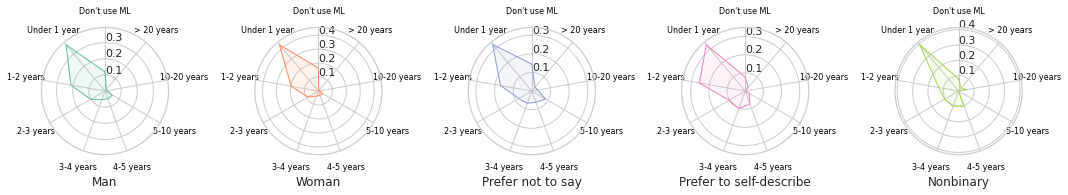

In [96]:
cat = order
N = len(cat)

f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)
for i, c in enumerate(categories):
    values = list(df[c])
    values += [values[0]]
 
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += [angles[0]]
 
    ax = plt.subplot(1, len(categories), i+1, polar=True)
    plt.xticks(angles[:-1], cat, color='black', size=8)
    plt.xlabel(c)
    ax.set_rlabel_position(0)
    ax.plot(angles, values, linewidth=1, linestyle='solid', color = palette[i])
    ax.fill(angles, values, color = palette[i], alpha=0.1)
    ax.set_theta_offset(np.deg2rad(90))
    
plt.tight_layout()

In [97]:
content(
    "Notice how similar the distributions are? In any gender group, most people belong to 'Under 1 year' " +
    "of ML experience. This is followed by '1-2 years' and 'Don't use ML'. Irrespective of gender, there " +
    "are hardly any people with a lot of experience."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Notice how similar the distributions are? In any gender group, most people belong to 'Under 1 year' of ML experience. This is followed by '1-2 years' and 'Don't use ML'. Irrespective of gender, there are hardly any people with a lot of experience.</span></div>

# Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)

In [98]:
content(
    "Let's find out which ML frameworks are popular amongst each gender group."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's find out which ML frameworks are popular amongst each gender group.</span></div>

In [99]:
frame_cols = [
    'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 
    'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14',
    'Q16_Part_15', 'Q16_OTHER'
]

df = data.loc[1:, ["Q2"] + frame_cols]

frame = [
    "Scikit-learn", "TensorFlow", "Keras", "PyTorch", "Fast.ai", "MXNet", "Xgboost", "LightGBM", "CatBoost",
    "Prophet", "H2O 3", "Caret", "Tidymodels", "JAX", "None", "Other"
]
df.columns = ["gender"] + frame

df[df[frame].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()

df = df.apply(lambda x: x/x.sum() * 100, axis = 1)

df.columns.name = "frameworks"
df = df.unstack().reset_index(name = "count")

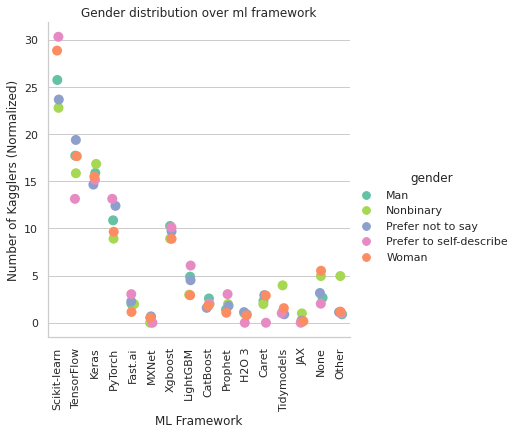

In [100]:
sns.catplot( 
    x = "frameworks", 
    y ="count",
    hue = "gender", 
    data = df, 
    palette = colors1,
    s = 10,
    jitter = True
)
plt.xlabel("ML Framework")
plt.ylabel("Number of Kagglers (Normalized)")
plt.xticks(rotation = 90)
plt.title("Gender distribution over ml framework")
plt.show()

In [101]:
content(
    "In each category, the genders are somewhat close, indicating that people of any gender have similar " +
    "tastes for ML frameworks. Scikit-learn is everyone's favourite, followed by other Python (mainly) " +
    "based libraries including TensorFlow, Keras and PyTorch."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>In each category, the genders are somewhat close, indicating that people of any gender have similar tastes for ML frameworks. Scikit-learn is everyone's favourite, followed by other Python (mainly) based libraries including TensorFlow, Keras and PyTorch.</span></div>

# Which of the following ML algorithms do you use on a regular basis? (Select all that apply)

In [102]:
content(
    "We previously looked at ML frameworks. Now let's look at ML algorithms popular in different " +
    "gender groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>We previously looked at ML frameworks. Now let's look at ML algorithms popular in different gender groups.</span></div>

In [103]:
algo_cols = [
    'Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 
    'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q17_Part_11', 'Q17_OTHER'
]

df = data.loc[1:, ["Q2"] + algo_cols]

algo = [
    "Linear/Logistic Regression", "DT/RF", "GBM", "Bayesian", "Evolutionary", "DNN", "CNN", "GAN", "RNN", 
    "Transformers", "None", "Other"
]
df.columns = ["gender"] + algo

df[df[algo].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum() * 100, axis = 1)

df.columns.name = "algo"
df = df.unstack().reset_index(name = "count")

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)

df = df.sort_values(["gender", "algo"])

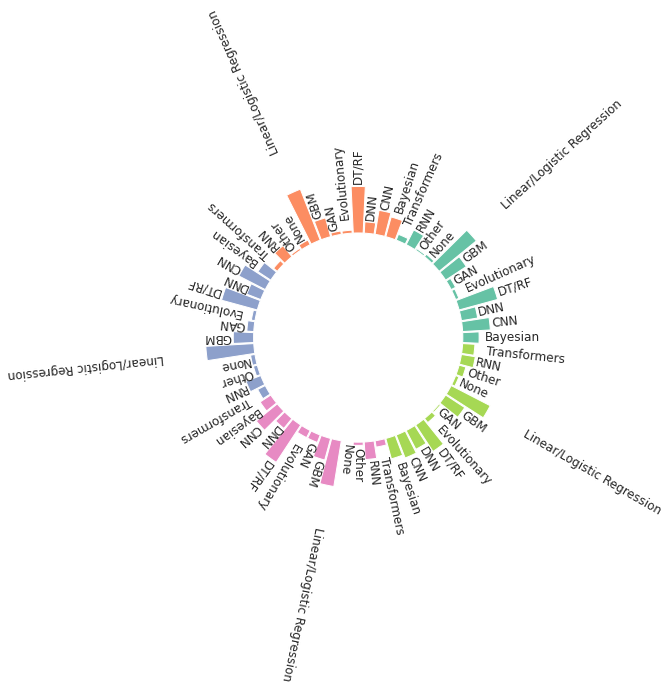

In [104]:
col = [(t,)*len(algo) for t in palette]
col = list(itertools.chain(*col)) 

lObjectsALLcnts = df["count"]

lObjectsALLlbls = df["algo"]

iN = len(lObjectsALLcnts)
arrCnts = np.array(lObjectsALLcnts)

theta=np.arange(0,2*np.pi,2*np.pi/iN)
width = (2*np.pi)/iN *0.9
bottom = 50

fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
bars = ax.bar(theta, arrCnts, width=width, bottom=bottom, color=col)

plt.axis('off')

rotations = np.rad2deg(theta)
y0,y1 = ax.get_ylim()

for x, bar, rotation, label in zip(theta, bars, rotations, lObjectsALLlbls):
    offset = (bottom+bar.get_height())/(y1-y0)
    lab = ax.text(0, 0, label, transform=None, ha='center', va='center')
    renderer = ax.figure.canvas.get_renderer()
    bbox = lab.get_window_extent(renderer=renderer)
    invb = ax.transData.inverted().transform([[0,0],[bbox.width,0] ])
    lab.set_position((x,offset+(invb[1][0]-invb[0][0])/2.*2.7 ) )
    lab.set_transform(ax.get_xaxis_transform())
    lab.set_rotation(rotation)
    
plt.show()

In [105]:
content(
    "What do we see here? There appears to be a pattern in the liking for ML algorithms. Linear/Logistic " +
    "Regression (two of the simplest approaches for regression and classification respectively) are most " +
    "popular irrespective of gender. Decision Tress / Random Forest follows. In any gender group, simpler " +
    "ML algorithms are much more popular than use of modern (and relatively difficult) ones like " +
    "GANs and Transformers."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>What do we see here? There appears to be a pattern in the liking for ML algorithms. Linear/Logistic Regression (two of the simplest approaches for regression and classification respectively) are most popular irrespective of gender. Decision Tress / Random Forest follows. In any gender group, simpler ML algorithms are much more popular than use of modern (and relatively difficult) ones like GANs and Transformers.</span></div>

# Which categories of computer vision methods do you use on a regular basis? (Select all that apply)

In [166]:
content(
    "Computer vision methods are an important area of focus in the Machine Learning domain. Let's explore " + 
    "the computer vision methods popular amongst gender groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Computer vision methods are an important area of focus in the Machine Learning domain. Let's explore the computer vision methods popular amongst gender groups.</span></div>

In [106]:
cv_cols = [
    'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_OTHER'
]

df = data.loc[1:, ["Q2"] + cv_cols]

cv = [
    "General purpose", "Segmentation", "Object detection", "Classification", "Generative", "None", "Other"
]
df.columns = ["gender"] + cv

df[df[cv].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum() * 100, axis = 1)

df.columns.name = "cv"

df = df.unstack().reset_index(name = "count")

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)

df = df.sort_values(["cv", "gender"])

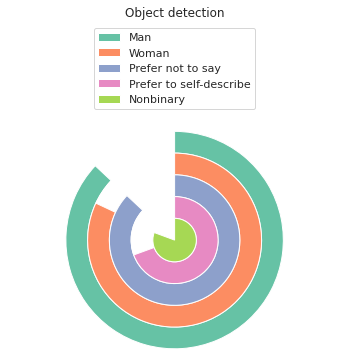

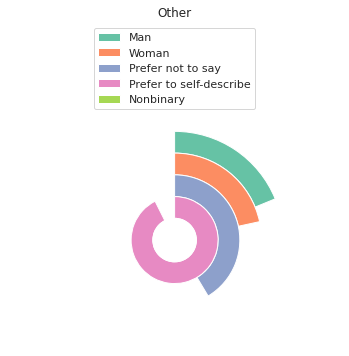

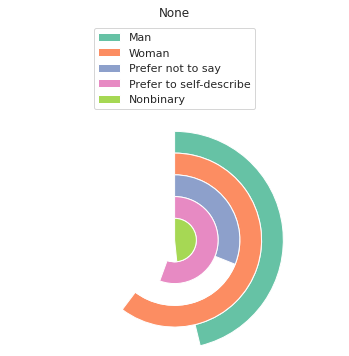

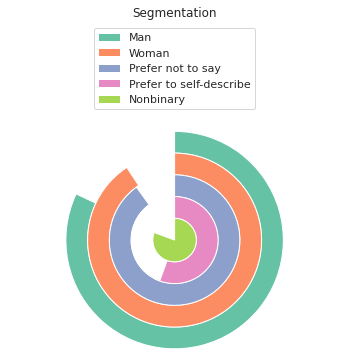

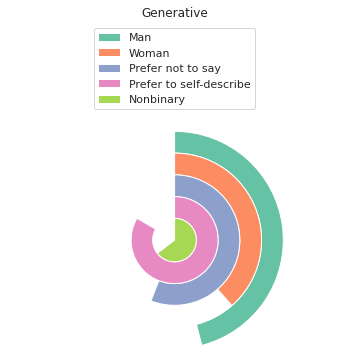

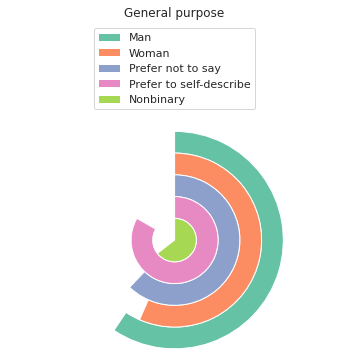

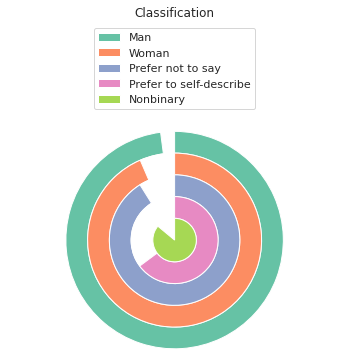

In [107]:
for c in set(df["cv"]):
    temp = df[df["cv"] == c]

    labels = list(temp["gender"])
    values = list(temp["count"])
    
    #number of data points
    n = len(values)
    #find max value for full ring
    k = 10 ** int(log10(max(values)))
    m = k * (1 + max(values) // k)

    #radius of donut chart
    r = 1.5
    #calculate width of each ring
    w = r / n 

    #create figure, axis
    fig, ax = plt.subplots()
    ax.axis("equal")

    #create rings of donut chart
    for i in range(n):
        #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
        innerring, _ = ax.pie(
            [m - values[i], values[i]], 
            radius = r - i * w, 
            startangle = 90, 
            labels = ["", labels[i]], 
            labeldistance = 1 - 1 / (1.5 * (n - i)), 
            textprops = {"alpha": 0}, 
            colors = ["white", palette[i]]
        )
        plt.setp(innerring, width = w, edgecolor = "white")

    plt.legend(loc = "upper center")
    plt.title(c)
    plt.ylim(0, 3)
    plt.show()

In [164]:
content(
    "It appears that different computer vision techniques are popular amongst different gender groups. For " +
    "Object Detection methods are almost equally popular amongst all. Segmentation methods are popular " +
    "amongst 'Woman' and 'Prefer not to say'. Generative modeling methods are popular amongst 'Prefer to " +
    "self describe'. Classification methods are popular amongst 'Man', 'Woman' and 'Prefer not to say'."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>It appears that different computer vision techniques are popular amongst different gender groups. For Object Detection methods are almost equally popular amongst all. Segmentation methods are popular amongst 'Woman' and 'Prefer not to say'. Generative modeling methods are popular amongst 'Prefer to self describe'. Classification methods are popular amongst 'Man', 'Woman' and 'Prefer not to say'.</span></div>

# Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply)

In [167]:
content(
    "Apart from Computer Vision methods, Natural Language Processing methods are an important area of " +
    "focus in the Machine Learning domain. Let's explore which methods are liked by which groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Apart from Computer Vision methods, Natural Language Processing methods are an important area of focus in the Machine Learning domain. Let's explore which methods are liked by which groups.</span></div>

In [108]:
nlp_cols = [
    "Q19_Part_1", "Q19_Part_2", "Q19_Part_3", "Q19_Part_4", "Q19_Part_5", "Q19_OTHER"
]

df = data.loc[1:, ["Q2"] + nlp_cols]

nlp = [
    "Embedding vectors", "Encoder-decoder", "Contextual embeddings", "Transformer", "None", "Other"
]
df.columns = ["gender"] + nlp

df[df[nlp].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()

df.columns.name = "nlp"
df = df.unstack().reset_index(name = "count")

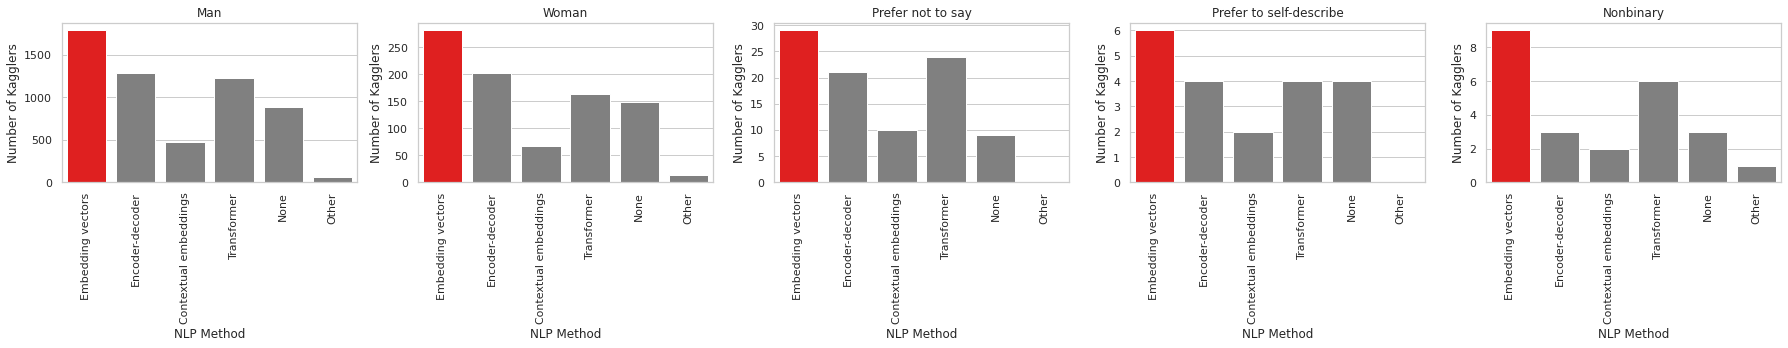

In [109]:
GetRedBar(df, categories, "nlp", "NLP Method")

In [168]:
content(
    "Embedding vectors are the most popular choice irrespective of gender. Encode-decoder frameworks and " +
    "Transformers follow. These patterns are consistent across different gender groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Embedding vectors are the most popular choice irrespective of gender. Encode-decoder frameworks and Transformers follow. These patterns are consistent across different gender groups.</span></div>

# What is the size of the company where you are employed?

In [169]:
content(
    "Information about companies where people work tells us a lot about the opportunities people get. "
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Information about companies where people work tells us a lot about the opportunities people get. </span></div>

In [110]:
df = data.loc[1:, ["Q2", "Q20"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q20": "size"
})

order = [
    '0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', 
    '10,000 or more employees' 
]
df["size"] = pd.Categorical(
    df["size"],
    categories = order,
    ordered = True
)

df = df.pivot_table(
    index = "size", 
    columns = "gender", 
    aggfunc = {
        "gender": "count"
    },
    fill_value = 0
)

df.columns = df.columns.droplevel(0)
df.columns.name = "Gender"

df = df + np.random.uniform(0, 1, df.shape[0])

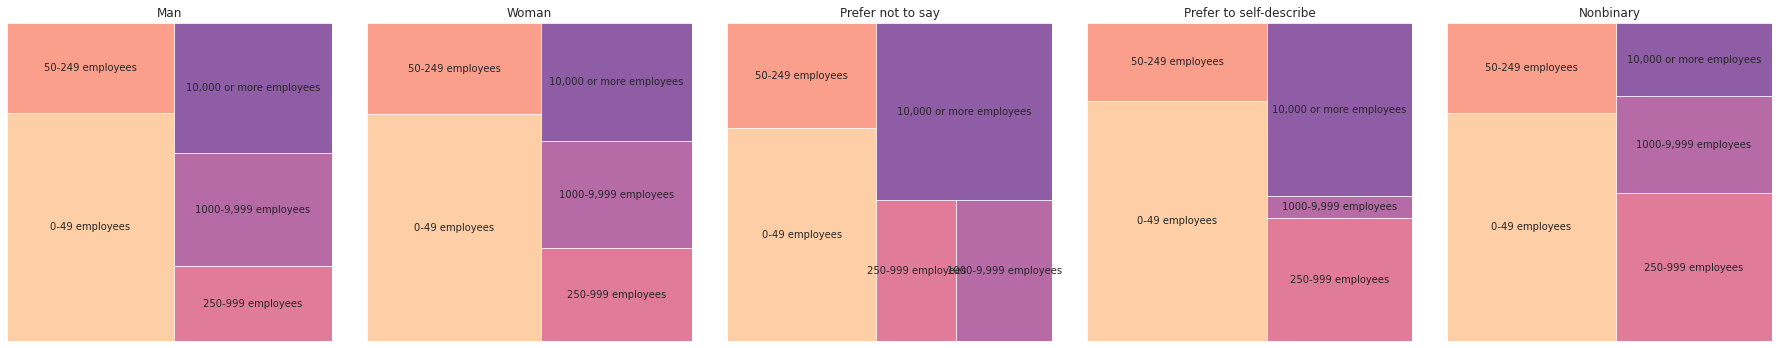

In [111]:
fig = plt.figure(figsize = (25,5)) 
gs = fig.add_gridspec(1, len(categories))

for i, cat in enumerate(categories):
    ax = fig.add_subplot(gs[0, i])
    
    squarify.plot(
        sizes = df[cat].values,  
        label = df[cat].keys(), 
        color = sns.color_palette("magma_r"),
        alpha = 0.7,
        text_kwargs = {
            "size": 10
        },
        ax = ax
    )
    ax.axis("off")
    ax.set_title(cat)
    
plt.tight_layout()

In [170]:
content(
    "Interestingly, irrespective of gender, people mostly work at small sized comapies (0-49 employees). " +
    "This trend is followed by slightly larger (50-249 employees). Despite disregarding the orientation of " +
    "the partitions, there is at least one inconsistency in the pattern. In the 'Prefer to self describe' " +
    "category, there are relatively very few who work at companies as large as 1000-9999 employees. " +
    "This is not to say they are necessarily discriminated against, because many belonging to that category " +
    "work at organizations with over 10000 employees."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Interestingly, irrespective of gender, people mostly work at small sized comapies (0-49 employees). This trend is followed by slightly larger (50-249 employees). Despite disregarding the orientation of the partitions, there is at least one inconsistency in the pattern. In the 'Prefer to self describe' category, there are relatively very few who work at companies as large as 1000-9999 employees. This is not to say they are necessarily discriminated against, because many belonging to that category work at organizations with over 10000 employees.</span></div>

# Approximately how many individuals are responsible for data science workloads at your place of business?

In [171]:
content(
    "Let's find out how people respond to this question."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's find out how people respond to this question.</span></div>

In [112]:
df = data.loc[1:, ["Q2", "Q21"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q21": "people"
})

order = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']
df["people"] = pd.Categorical(
    df["people"],
    categories = order,
    ordered = True
)

df = df.groupby(["gender", "people"]).agg(
    count = pd.NamedAgg("gender", "count")
).reset_index()

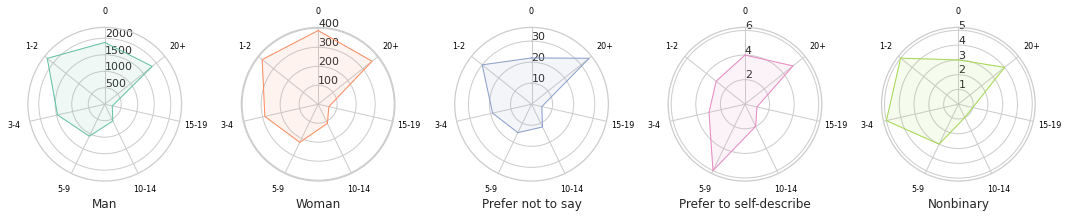

In [113]:
cat = order
N = len(cat)

f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)
for i, c in enumerate(categories):
    temp = df[df["gender"] == c]
    values = list(temp["count"])
    values += [values[0]]
 
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += [angles[0]]
 
    ax = plt.subplot(1, len(categories), i+1, polar=True)
    plt.xticks(angles[:-1], cat, color='black', size=8)
    plt.xlabel(c)
    ax.set_rlabel_position(0)
    ax.plot(angles, values, linewidth=1, linestyle='solid', color = palette[i])
    ax.fill(angles, values, color = palette[i], alpha=0.1)
    ax.set_theta_offset(np.deg2rad(90))
    
plt.tight_layout()

In [172]:
content(
    "There isn't much of a pattern apparent in this case. Except for the 'Prefer to self-describe' category " +
    "there are mostly only 1-2 people handling data science work loads. This is followed by 0 or 3-4 " +
    "which are small numbers. 20+ is also a popular choice. It may be interpretted that there are either " +
    "upto 4 people (perhaps in smaller companies) while about 20+ (perhaps in larger companies) which are " +
    "responsible for workloads, irrespective of gender."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>There isn't much of a pattern apparent in this case. Except for the 'Prefer to self-describe' category there are mostly only 1-2 people handling data science work loads. This is followed by 0 or 3-4 which are small numbers. 20+ is also a popular choice. It may be interpretted that there are either upto 4 people (perhaps in smaller companies) while about 20+ (perhaps in larger companies) which are responsible for workloads, irrespective of gender.</span></div>

# Does your current employer incorporate machine learning methods into their business?

In [173]:
content(
    "The answer to this question gives us insights into what kind of places different gender groups work " +
    "at. Companies incorporting ML methods into business (i.e. Data driven companies) may be regarded to " +
    "be better than those which do not incorporate ML. It is well known that companies not leveraging " +
    "data for decision making and running their business will fall behind those who do, in the near future."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>The answer to this question gives us insights into what kind of places different gender groups work at. Companies incorporting ML methods into business (i.e. Data driven companies) may be regarded to be better than those which do not incorporate ML. It is well known that companies not leveraging data for decision making and running their business will fall behind those who do, in the near future.</span></div>

In [114]:
df = data.loc[1:, ["Q2", "Q22"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q22": "adopt"
})

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)

df["adopt"] = df["adopt"].replace({
    "No (we do not use ML methods)": "No",
    "We are exploring ML methods (and may one day put a model into production)": "Exploring",
    "We have well established ML methods (i.e., models in production for more than 2 years)": "Been >2 years",
    "We recently started using ML methods (i.e., models in production for less than 2 years)": "Been <2 years",
    "We use ML methods for generating insights (but do not put working models into production)": "Only insights"
})

df = df.pivot_table(
    index = "adopt", 
    columns = "gender", 
    aggfunc = {
        "gender": "count"
    },
    fill_value = 0
)

df.columns = df.columns.droplevel(0)
df.columns.name = "Gender"

df = df.apply(lambda x: x/x.sum())

<ipython-input-115-994602dbdaca>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_yaxis.set_ticklabels(row_names, rotation = 90)


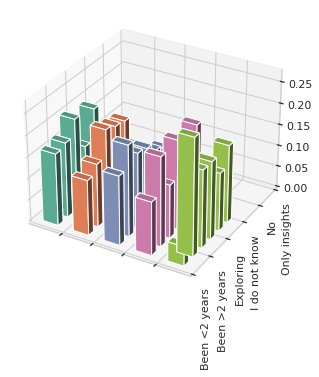

In [115]:
column_names = list(df.columns)
row_names = list(df.index)

fig = plt.figure()
ax = Axes3D(fig)

df = df.values

lx= len(df[0])            # Work out matrix dimensions
ly= len(df[:,0])
xpos = np.arange(0,lx,1)    # Set up a mesh of positions
ypos = np.arange(0,ly,1)
xpos, ypos = np.meshgrid(xpos+0.25, ypos+0.25)

xpos = xpos.flatten()   # Convert positions to 1D array
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = df.flatten()

ax.bar3d(xpos,ypos,zpos, dx, dy, dz, color=palette*ly)

ax.w_xaxis.set_ticklabels([]) #column_names, rotation = 90)
ax.w_yaxis.set_ticklabels(row_names, rotation = 90)
# ax.set_xlabel('Letter')
# ax.set_ylabel('Day')
# ax.set_zlabel('Occurrence')
ax.set_ylim3d(0, 10)

plt.show()

In [174]:
content(
    "There appears to be a regular pattern. Irrespective of gender, most work at companies that have been " +
    "using ML for at least 2 years now. Other popular choices include - 'Exploring' and 'Only insights'. " +
    "Irrespective of gender, a lot of people have no knowledge of whether or not their companies us ML."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>There appears to be a regular pattern. Irrespective of gender, most work at companies that have been using ML for at least 2 years now. Other popular choices include - 'Exploring' and 'Only insights'. Irrespective of gender, a lot of people have no knowledge of whether or not their companies us ML.</span></div>

# Select any activities that make up an important part of your role at work: (Select all that apply)

In [175]:
content(
    "What people do at work gives us insights into things like - the positions they hold, the " +  
    "opportunities they get and the kind of things they choose to do. Let's explore."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>What people do at work gives us insights into things like - the positions they hold, the opportunities they get and the kind of things they choose to do. Let's explore.</span></div>

In [116]:
role_cols = [
    'Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 
    'Q23_OTHER'
]

df = data.loc[1:, ["Q2"] + role_cols]

role = [
    "Analyze and understand", "Build infrastructure", "Build prototype", "Build ML service", 
    "Experiment with ML", "Research", "None", "Other"
]
df.columns = ["gender"] + role

df[df[role].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum(), axis = 1)

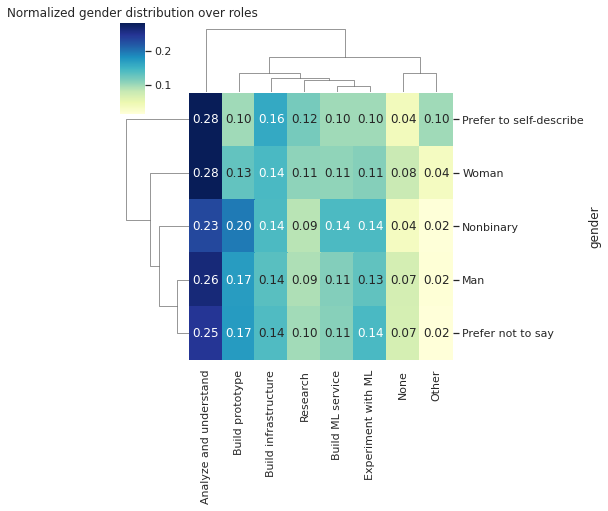

In [117]:
sns.clustermap(
    df,
    annot = True,
    cmap = "YlGnBu",
    fmt = ".2f",
    figsize = (7, 7)
)
plt.title("Normalized gender distribution over roles")
plt.show()

In [176]:
content(
    "There is a decreasing pattern of darkness from left to right for any gender group. In any case, " + 
    "people mostly work on analyzing and understanding data."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>There is a decreasing pattern of darkness from left to right for any gender group. In any case, people mostly work on analyzing and understanding data.</span></div>

# What is your current yearly compensation (approximate USD)?

In [177]:
content(
    "Yearly compensation tells us how wealth is distributed amongst different gender groups. It is " +
    "an important factor to consider when evaluating gender groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Yearly compensation tells us how wealth is distributed amongst different gender groups. It is an important factor to consider when evaluating gender groups.</span></div>

In [118]:
df = data.loc[1:, ["Q2", "Q24"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q24": "compensation"
})

order = [
    '$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
    '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
    '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999',
    '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-500,000', 
    '> $500,000'
]

df["compensation"] = pd.Categorical(
    df["compensation"],
    categories = order,
    ordered = True
)

df = df.groupby(["gender", "compensation"]).agg(
    count = pd.NamedAgg("gender", "count")
).reset_index()

df["normal_gender_count"] = df.groupby(["gender"])["count"].transform(lambda x: x/x.sum() * 100)
df["normal_gender_count"] = df["normal_gender_count"] + np.random.uniform(0, 2, df.shape[0])

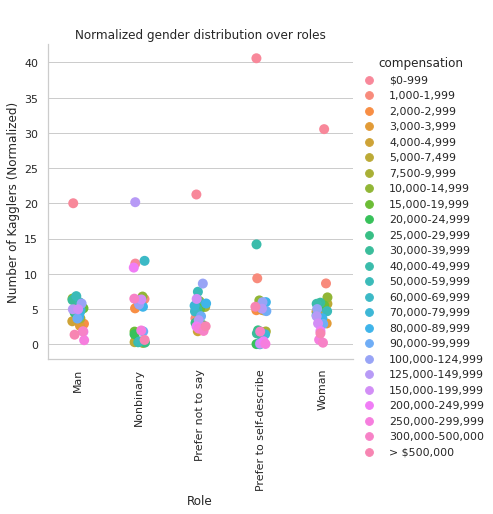

In [119]:
sns.catplot(
    x = "gender", 
    y = "normal_gender_count", 
    hue = "compensation", 
    data = df, 
    s = 10,
    jitter = True
)
plt.xlabel("Role")
plt.ylabel("Number of Kagglers (Normalized)")
plt.xticks(rotation = 90)
plt.title("Normalized gender distribution over roles")
plt.show()

In [178]:
content(
    "What we see here is that irrespective of gender, the distribution of wealth within gender groups " +
    "appears to be similar. With the exception of 'Nonbnary', most earn between 0-999 USD a year. " +
    "In general, in any gender group, there are some who earn a lot, some who earn very little " + 
    "and some who earn in between."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>What we see here is that irrespective of gender, the distribution of wealth within gender groups appears to be similar. With the exception of 'Nonbnary', most earn between 0-999 USD a year. In general, in any gender group, there are some who earn a lot, some who earn very little and some who earn in between.</span></div>

# Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate USD)?

In [179]:
content(
    "Let's find out how much gender groups have spent on ML cloud computing services."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's find out how much gender groups have spent on ML cloud computing services.</span></div>

In [240]:
df = data.loc[1:, ["Q2", "Q25"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q25": "expenditure"
})

df["expenditure"] = df["expenditure"].replace({
    '$0 ($USD)': "0",
    '$1-$99': "1-99",
    '$10,000-$99,999': "10000-99999",
    '$100,000 or more ($USD)': ">= 100000",
    '$100-$999': "100-999",
    '$1000-$9,999': "1000-9999"
})

order = ["0", "1-99", "100-999", "1000-9999", "10000-99999", ">= 100000"]
df["expenditure"] = pd.Categorical(
    df["expenditure"],
    categories = order,
    ordered = True
)

df = df.pivot_table(
    index = "expenditure", 
    columns = "gender", 
    aggfunc = {
        "gender": "count"
    },
    fill_value = 0
)

df.columns = df.columns.droplevel(0)
df.columns.name = "Gender"

df = df.apply(lambda x: x/x.sum()* 100)

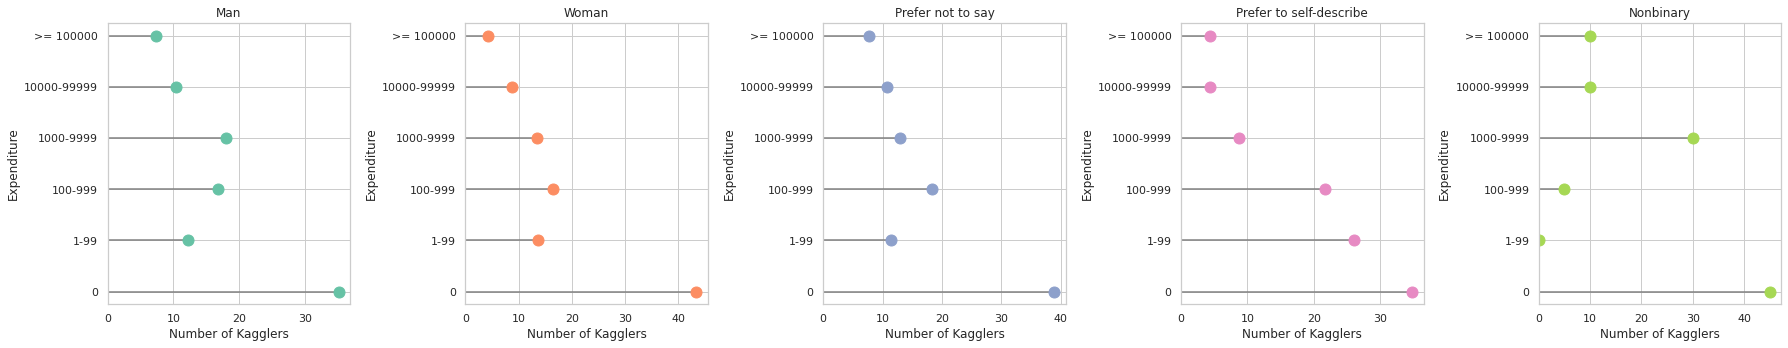

In [241]:
plt.subplots(figsize = (25, 5))
for i, c in enumerate(categories):
    plt.subplot(1, 5, i+1)
    
    temp = df[c]

    my_range = range(1, len(temp) + 1)
    
    plt.hlines(
        y = my_range, 
        xmin = 0, 
        xmax = temp.values, 
        color = 'gray'
    )

    plt.plot(
        temp.values, 
        my_range, 
        'o', 
        markersize = 11,
        color = colors1[c]
    )

    plt.yticks(my_range, order)
    plt.xlim(left = 0)
    plt.title(c)
    plt.xlabel("Number of Kagglers")
    plt.ylabel("Expenditure")
    
plt.tight_layout()

In [180]:
content(
    "Notice the regular pattern over all gender groups? In each gender group, most have selected 0. Other " +
    "selections also appear to be very similar."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Notice the regular pattern over all gender groups? In each gender group, most have selected 0. Other selections also appear to be very similar.</span></div>

# Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)

In [181]:
content(
    "Let's explore the different cloud computing platforms used by different gender groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's explore the different cloud computing platforms used by different gender groups.</span></div>

In [122]:
cloud_cols = [
    "Q26_A_Part_1", "Q26_A_Part_2", "Q26_A_Part_3", "Q26_A_Part_4", "Q26_A_Part_5", "Q26_A_Part_6", 
    "Q26_A_Part_7", "Q26_A_Part_8", "Q26_A_Part_9", "Q26_A_Part_10", "Q26_A_Part_11", "Q26_A_OTHER"
]

df = data.loc[1:, ["Q2"] + cloud_cols]

cloud = [
    "AWS", "Azure", "GCP", "IBM Cloud / Red Hat", "Oracle Cloud", "SAP Cloud", "Salesforce Cloud",
    "VMware Cloud", "Alibaba Cloud", "Tencent Cloud", "None", "Other"
]
df.columns = ["gender"] + cloud

df[df[cloud].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum() * 100, axis = 1)

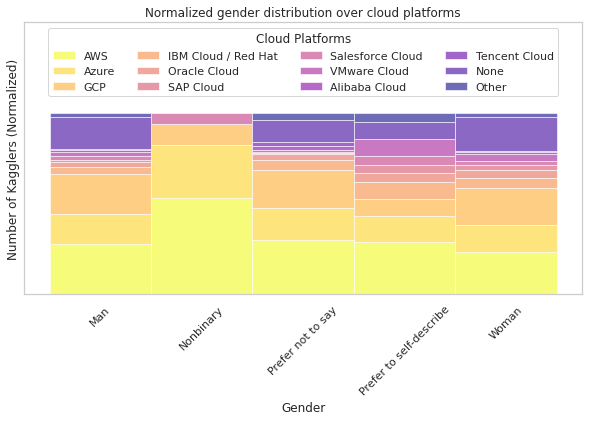

In [123]:
df.plot(
    kind = "bar",
    stacked = True,
    figsize = (10, 5),
    colormap = "plasma_r",
    width = 1,
    alpha = 0.6
)
plt.ylim(0, 150)
plt.xticks(rotation = 45)
plt.yticks([])
plt.xlabel("Gender")
plt.ylabel("Number of Kagglers (Normalized)")
plt.title("Normalized gender distribution over cloud platforms")
plt.legend(ncol = 4, loc = "upper center", title = "Cloud Platforms")

ax = plt.gca()
ax.grid(False)

In [182]:
content(
    "With the exception of 'Nonbinary', the pattern appears to be similar. In any gender category, most " +
    "use AWS, followed by GCP and Azure. Other platforms do not seem to be very popular. " + 
    "A lot of people use 'None'. In the case of 'Nonbinary', relatively more use AWS."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>With the exception of 'Nonbinary', the pattern appears to be similar. In any gender category, most use AWS, followed by GCP and Azure. Other platforms do not seem to be very popular. A lot of people use 'None'. In the case of 'Nonbinary', relatively more use AWS.</span></div>

# Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?

In [183]:
content(
    "Let's look at which cloud platforms people hope to become more familiar with in the following years."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's look at which cloud platforms people hope to become more familiar with in the following years.</span></div>

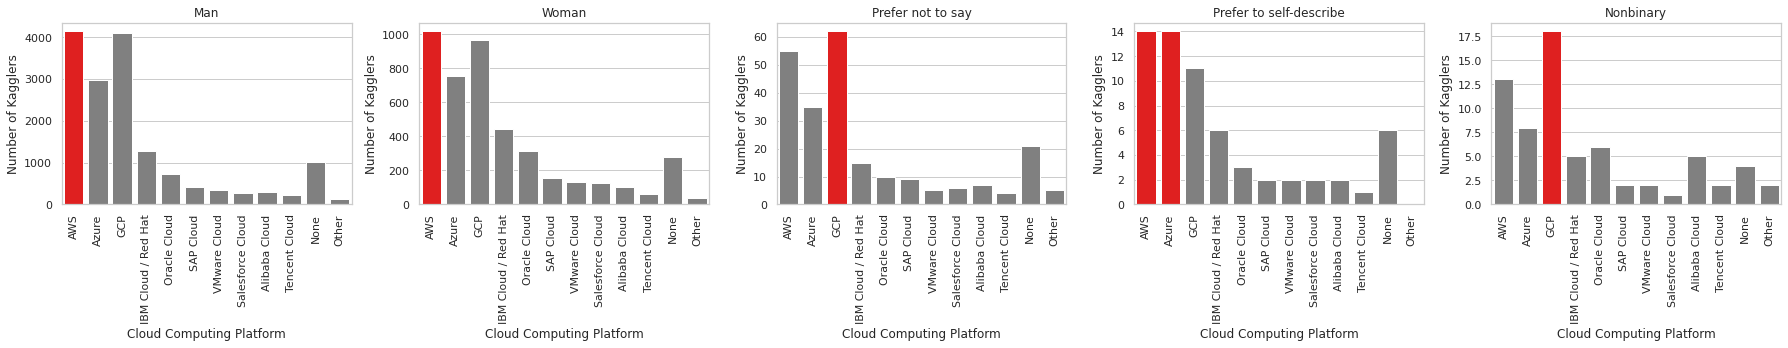

In [124]:
cloud_cols = [
    'Q26_B_Part_1', 'Q26_B_Part_2', 'Q26_B_Part_3', 'Q26_B_Part_4', 'Q26_B_Part_5', 'Q26_B_Part_6', 
    'Q26_B_Part_7', 'Q26_B_Part_8', 'Q26_B_Part_9', 'Q26_B_Part_10', 'Q26_B_Part_11', 'Q26_B_OTHER'
]

df = data.loc[1:, ["Q2"] + cloud_cols]

cloud = [
    "AWS", "Azure", "GCP", "IBM Cloud / Red Hat", "Oracle Cloud", "SAP Cloud", "VMware Cloud", 
    "Salesforce Cloud", "Alibaba Cloud", "Tencent Cloud", "None", "Other"
]

df.columns = ["gender"] + cloud

df[df[cloud].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df.columns.name = "cloud platform"
df = df.unstack().reset_index(name = "count")

GetRedBar(df, categories, "cloud platform", "Cloud Computing Platform")

In [184]:
content(
    "Unsurprisingly, AWS is a popular choice but GCP does not seem to be far behind. Azure is the other " +
    "popular choice in any gender group. Other platforms are not so popular."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Unsurprisingly, AWS is a popular choice but GCP does not seem to be far behind. Azure is the other popular choice in any gender group. Other platforms are not so popular.</span></div>

# Do you use any of the following cloud computing products on a regular basis? (Select all that apply)

In [185]:
content(
    "Let's look at which cloud computing products are used by people on a regular basis."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's look at which cloud computing products are used by people on a regular basis.</span></div>

In [243]:
cloud_cols = [
    "Q27_A_Part_1", "Q27_A_Part_2", "Q27_A_Part_3", "Q27_A_Part_4", "Q27_A_Part_5", "Q27_A_Part_6", 
    "Q27_A_Part_7", "Q27_A_Part_8", "Q27_A_Part_9", "Q27_A_Part_10", "Q27_A_Part_11", "Q27_A_OTHER"
]

df = data.loc[1:, ["Q2"] + cloud_cols]

cloud = [
    "Amazon EC2", "AWS Lambda", "Amazon Elastic Container Service", "Azure Cloud Services", 
    "Microsoft Azure Container Instances", "Azure Functions", "Google Cloud Compute Engine",
    "Google Cloud Functions", "Google Cloud Run", "Google Cloud App Engine", "No / None", "Other"
]
df.columns = ["gender"] + cloud

df[df[cloud].notnull()] = 1
df = df.fillna(0)

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)
    
df = df.groupby(["gender"]).sum()
    
temp = df.apply(lambda x: x/x.sum(), axis = 1)

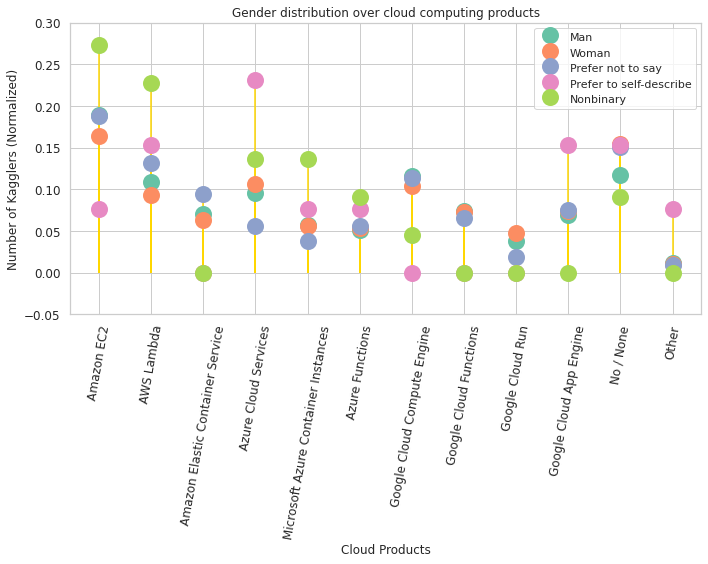

In [244]:
plt.figure(figsize = (10, 8))
for i, c in enumerate(categories):
    (markerline, stemlines, baseline) = plt.stem(
        temp.columns,
        temp.loc[c]
    )
    plt.setp(
        markerline, 
        marker = 'o', 
        markersize = 15,
        markeredgewidth = 2, 
        color = palette[i]
    )
    plt.setp(stemlines, color = "gold")
    plt.setp(baseline, visible = False)
    plt.tick_params(labelsize = 12)
    plt.xticks(rotation = 80)
    plt.ylim(-0.05, 0.3)
    
    plt.xlabel("Cloud Products")
    plt.ylabel("Number of Kagglers (Normalized)")
    
    plt.legend(categories)
    plt.title("Gender distribution over cloud computing products")
    
plt.tight_layout()

In [186]:
content(
    "It appears that different cloud products are used by different gender groups. For example, 'Nonbinary'" +
    "regularly use Amazon EC2, AWS Lambda, Azure Container Instances and Azure Functions. 'Prefer to self " +
    "describe' regularly use Azure Cloud Services and Google Cloud App Engine. A lot of them use other, " +
    "lesser known services and there are whose who use None. There isn't an evident pattern in people's " +
    "use of products. This could be attributed to the different roles people take up at work. This does not " +
    "imply that any one is better than another."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>It appears that different cloud products are used by different gender groups. For example, 'Nonbinary'regularly use Amazon EC2, AWS Lambda, Azure Container Instances and Azure Functions. 'Prefer to self describe' regularly use Azure Cloud Services and Google Cloud App Engine. A lot of them use other, lesser known services and there are whose who use None. There isn't an evident pattern in people's use of products. This could be attributed to the different roles people take up at work. This does not imply that any one is better than another.</span></div>

# In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)

In [187]:
content(
    "Now that we know which cloud computing products people use on a regular basis, let's look at products " +
    "they want to become familiar with in the next 2 years."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Now that we know which cloud computing products people use on a regular basis, let's look at products they want to become familiar with in the next 2 years.</span></div>

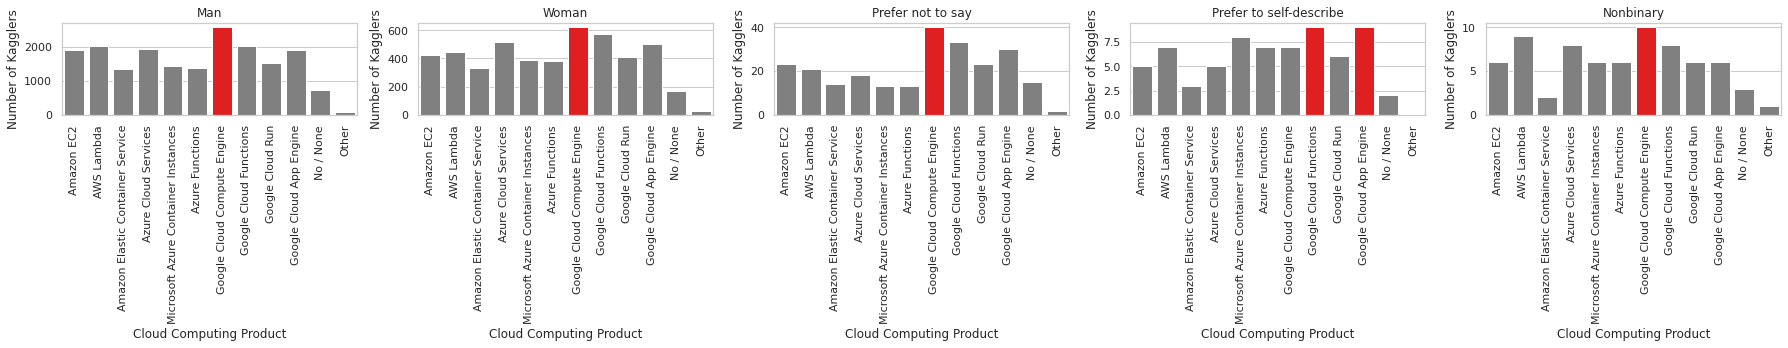

In [127]:
cloud_cols = [
    'Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4', 'Q27_B_Part_5', 'Q27_B_Part_6', 
    'Q27_B_Part_7', 'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 'Q27_B_Part_11', 'Q27_B_OTHER'
]

df = data.loc[1:, ["Q2"] + cloud_cols]

df.columns = ["gender"] + cloud

df[df[cloud].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()

df.columns.name = "cloud"
df = df.unstack().reset_index(name = "count")

GetRedBar(df, categories, "cloud", "Cloud Computing Product")

In [188]:
content(
    "While 'Prefer to self describe' mainly want to learn Google  Cloud Functions and Google Cloud App " + 
    "Engine in the next 2 years, others intend to learn maily Google Cloud Compute Engine. In general, " +
    "Google Cloud remains the platform of choice in any gender category."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>While 'Prefer to self describe' mainly want to learn Google  Cloud Functions and Google Cloud App Engine in the next 2 years, others intend to learn maily Google Cloud Compute Engine. In general, Google Cloud remains the platform of choice in any gender category.</span></div>

# Do you use any of the following machine learning products on a regular basis? (Select all that apply)

In [189]:
content(
    "Let's explore the ML products used by gender groups on a regular bases."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's explore the ML products used by gender groups on a regular bases.</span></div>

In [128]:
prod_cols = [
    "Q28_A_Part_1", "Q28_A_Part_2", "Q28_A_Part_3", "Q28_A_Part_4", "Q28_A_Part_5", "Q28_A_Part_6", 
    "Q28_A_Part_7", "Q28_A_Part_8", "Q28_A_Part_9", "Q28_A_Part_10", "Q28_A_OTHER"
]

df = data.loc[1:, ["Q2"] + prod_cols]

prod = [
    "Amazon SageMaker", "Amazon Forecast", "Amazon Rekognition", "Azure ML Studio", "Azure Cognitive Services",
    "Google AI Platform", "Google Video AI", "Google Natural Language", "Google Vision AI", "No / None", 
    "Other"
]
df.columns = ["gender"] + prod

df[df[prod].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum()*2000, axis = 1)

df.columns.name = "prod"
df = df.unstack().reset_index(name = "count")

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)
df = df.sort_values(["gender", "prod"], ignore_index = True)

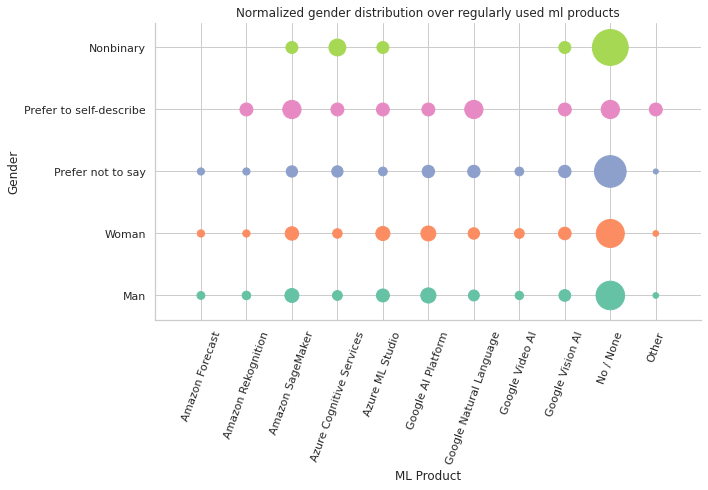

In [129]:
fg = sns.FacetGrid(
    data = df, 
    hue = 'gender',
    hue_order = categories,
    palette = "Set2", 
    height = 5, 
    aspect = 2
)
fg.map(plt.scatter, "prod", "gender", "count")
plt.margins(0.1)
plt.xlabel("ML Product")
plt.ylabel("Gender")
plt.xticks(rotation = 70)
plt.title("Normalized gender distribution over regularly used ml products")
plt.show()

In [190]:
content(
    "The 'Nonbinary' category doesn't have enough data. Othrwise the pattern is quite regular. Most " + 
    "people belonging to any gender group do not use any ML products."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>The 'Nonbinary' category doesn't have enough data. Othrwise the pattern is quite regular. Most people belonging to any gender group do not use any ML products.</span></div>

# In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply)

In [191]:
content(
    "Let's have a look at which ML products people hope to become more familiar with in the next 2 years."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's have a look at which ML products people hope to become more familiar with in the next 2 years.</span></div>

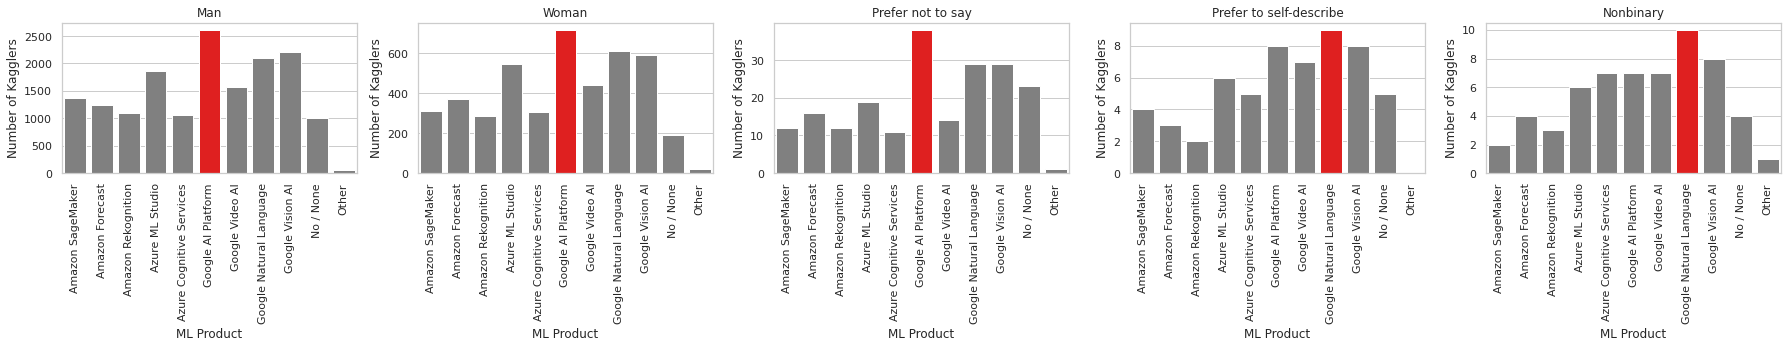

In [130]:
prod_cols = [
    'Q28_B_Part_1', 'Q28_B_Part_2', 'Q28_B_Part_3', 'Q28_B_Part_4', 'Q28_B_Part_5', 'Q28_B_Part_6',
    'Q28_B_Part_7', 'Q28_B_Part_8', 'Q28_B_Part_9', 'Q28_B_Part_10', 'Q28_B_OTHER'
]

df = data.loc[1:, ["Q2"] + prod_cols]

prod = [
    "Amazon SageMaker", "Amazon Forecast", "Amazon Rekognition", "Azure ML Studio", "Azure Cognitive Services",
    "Google AI Platform", "Google Video AI", "Google Natural Language", "Google Vision AI", "No / None", 
    "Other"
]
df.columns = ["gender"] + prod

df[df[prod].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()

df.columns.name = "prod"
df = df.unstack().reset_index(name = "count")

GetRedBar(df, categories, "prod", "ML Product")

In [192]:
content(
    "While Google AI Platform is the most popular choice amongst 'Man', 'Woman' and 'Prefer not to say', " +
    "those which belong to 'Prefer to self describe' and 'Nonbinary' intend to learn Google Cloud Natural " +
    "Language. Google products appear to be quite popular in all gender groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>While Google AI Platform is the most popular choice amongst 'Man', 'Woman' and 'Prefer not to say', those which belong to 'Prefer to self describe' and 'Nonbinary' intend to learn Google Cloud Natural Language. Google products appear to be quite popular in all gender groups.</span></div>

# Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)

In [193]:
content(
    "Let's have a look at the big data products used by people on a regular basis."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's have a look at the big data products used by people on a regular basis.</span></div>

/home/akshitbhalla/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


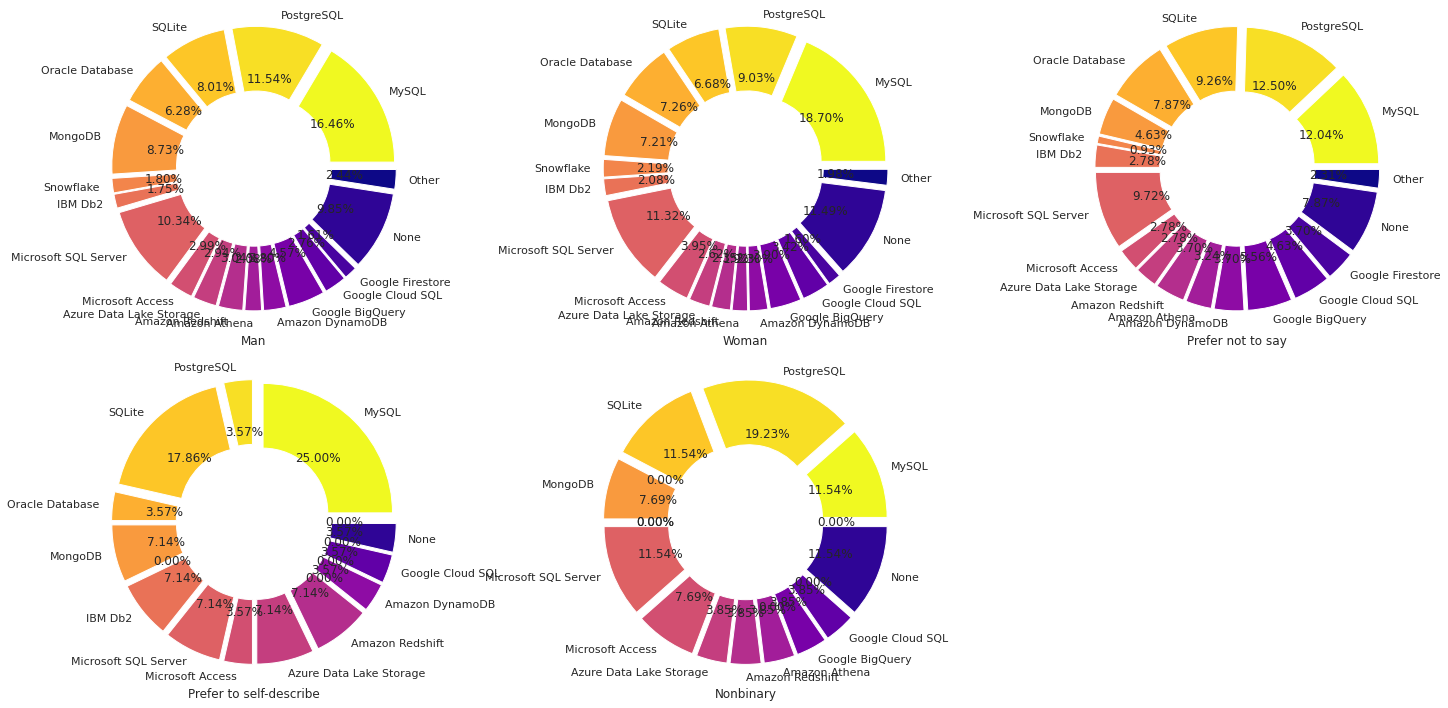

In [131]:
prod_cols = [
    "Q29_A_Part_1", "Q29_A_Part_2", "Q29_A_Part_3", "Q29_A_Part_4", "Q29_A_Part_5", "Q29_A_Part_6", 
    "Q29_A_Part_7", "Q29_A_Part_8", "Q29_A_Part_9", "Q29_A_Part_10", "Q29_A_Part_11", "Q29_A_Part_12", 
    "Q29_A_Part_13", "Q29_A_Part_14", "Q29_A_Part_15", "Q29_A_Part_16", "Q29_A_Part_17", "Q29_A_OTHER"
]

df = data.loc[1:, ["Q2"] + prod_cols]

prod = [
    "MySQL", "PostgreSQL", "SQLite", "Oracle Database", "MongoDB", "Snowflake", "IBM Db2", 
    "Microsoft SQL Server", "Microsoft Access", "Azure Data Lake Storage", "Amazon Redshift", "Amazon Athena",
    "Amazon DynamoDB", "Google BigQuery", "Google Cloud SQL", "Google Firestore", "None", "Other"
]
df.columns = ["gender"] + prod

temp, df = GenderPiePlot(df, categories, prod)

In [194]:
content(
    "SQLite, PostgreSQL, MySQL and Microsoft SQL Server are popular choices. A lot of people use None. These" +
    "trends are consistent through the gender categories. Minor deviations such as relatively high MySQL " +
    "and low PostgreSQL in 'Prefer to self describe'."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>SQLite, PostgreSQL, MySQL and Microsoft SQL Server are popular choices. A lot of people use None. Thesetrends are consistent through the gender categories. Minor deviations such as relatively high MySQL and low PostgreSQL in 'Prefer to self describe'.</span></div>

# Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)

In [195]:
content(
    "We saw the big data products used regularly. Now let's look at those big data products which people " +
    "want to become more familiar with in the next 2 years."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>We saw the big data products used regularly. Now let's look at those big data products which people want to become more familiar with in the next 2 years.</span></div>

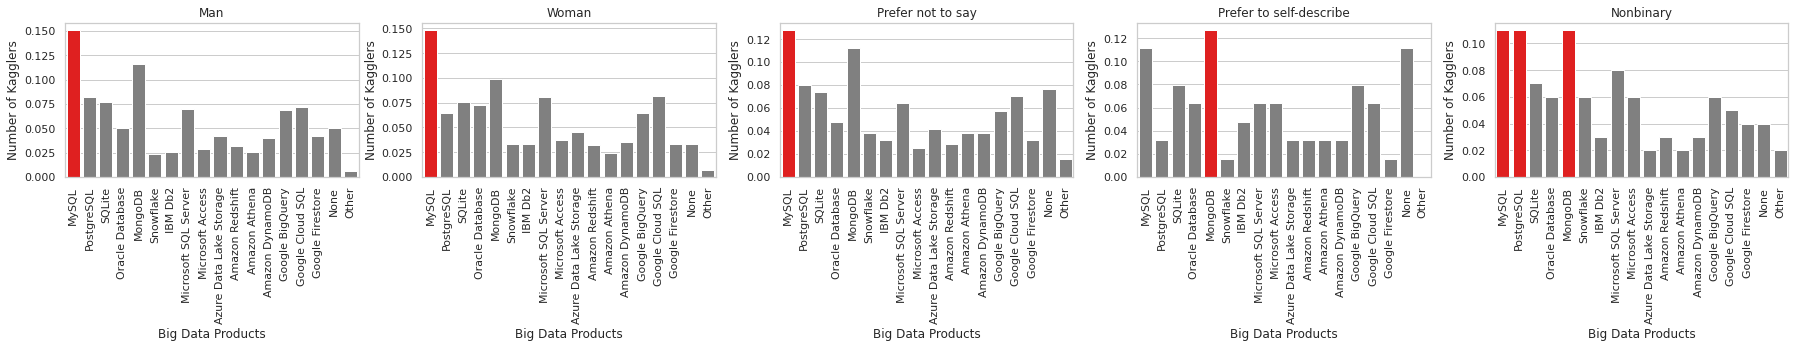

In [132]:
prod_cols = [
    'Q29_B_Part_1', 'Q29_B_Part_2', 'Q29_B_Part_3', 'Q29_B_Part_4', 'Q29_B_Part_5', 'Q29_B_Part_6', 
    'Q29_B_Part_7', 'Q29_B_Part_8', 'Q29_B_Part_9', 'Q29_B_Part_10', 'Q29_B_Part_11', 'Q29_B_Part_12',
    'Q29_B_Part_13', 'Q29_B_Part_14', 'Q29_B_Part_15', 'Q29_B_Part_16', 'Q29_B_Part_17', 'Q29_B_OTHER' 
]
df = data.loc[1:, ["Q2"] + prod_cols]
df.columns = ["gender"] + prod

df[df[prod].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
df = df.apply(lambda x: x/x.sum(), axis = 1)
df.columns.name = "prod"
df = df.unstack().reset_index(name = "count")

GetRedBar(df, categories, "prod", "Big Data Products")

In [196]:
content(
    "MySQL appears to be the favourite in all 5 cases. In the case of 'Nonbinary', PostgresSQL and MongoDB " +
    "appear to be equally popular."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>MySQL appears to be the favourite in all 5 cases. In the case of 'Nonbinary', PostgresSQL and MongoDB appear to be equally popular.</span></div>

# Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?

In [197]:
content(
    "We've seen big data products that people use regularly and those that people would like to learn " +
    "in the next 2 years. Let's see which ones are used most often."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>We've seen big data products that people use regularly and those that people would like to learn in the next 2 years. Let's see which ones are used most often.</span></div>

In [133]:
df = data.loc[1:, ["Q2", "Q30"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q30": "prod"
})

df["prod"] = pd.Categorical(
    df["prod"],
    categories = set(df["prod"])
)

df = df.groupby(["gender", "prod"]).agg(
    count = pd.NamedAgg("gender", "count")
).reset_index()

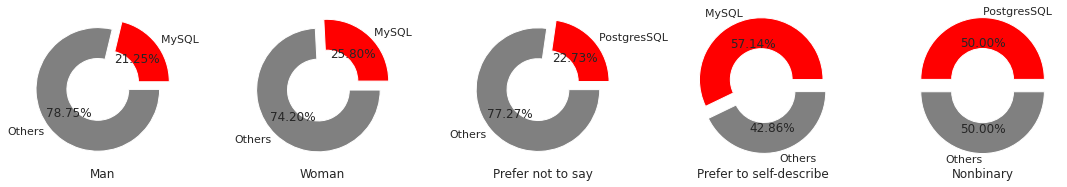

In [134]:
for i, cat in enumerate(categories):
    temp = df[df["gender"] == cat]
    max_count = temp[temp["count"] == max(temp["count"])]
    other_sum = temp.drop(max_count.index)["count"].sum()
    
    max_count = max_count.append({
        "gender": cat,
        "prod": "Others",
        "count": other_sum
    }, 
        ignore_index = True
    )
    
    plt.subplot(1, 5, i+1)
    max_count["count"].plot(
        kind = "pie",
        explode = [0.1]*max_count.shape[0],   
        autopct = "%1.2f%%", 
        pctdistance = 0.6,
        wedgeprops = dict(width = 0.5),
        colors = ["red"] * (max_count.shape[0] - 1) + ["gray"],
        figsize = (15, 15),
        labels = max_count["prod"]
    )
    plt.ylabel("")
    plt.xlabel(cat)
    
plt.tight_layout()    

In [198]:
content(
    "Again, MySQL and PostgresSQL are the most popular choices. In the case of 'Prefer to self describe' " +
    "and 'Nonbinary', there is an exceptional number of people contributing to the total. This is likely " +
    "due to little data collection from these groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Again, MySQL and PostgresSQL are the most popular choices. In the case of 'Prefer to self describe' and 'Nonbinary', there is an exceptional number of people contributing to the total. This is likely due to little data collection from these groups.</span></div>

# Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)

In [199]:
content(
    "With the advent of data era, Business Intelligence Tools became popular. Let's see the tools used by " +
    "different groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>With the advent of data era, Business Intelligence Tools became popular. Let's see the tools used by different groups.</span></div>

In [135]:
bi_cols = [
    "Q31_A_Part_1", "Q31_A_Part_2", "Q31_A_Part_3", "Q31_A_Part_4", "Q31_A_Part_5", "Q31_A_Part_6", 
    "Q31_A_Part_7", "Q31_A_Part_8", "Q31_A_Part_9", "Q31_A_Part_10", "Q31_A_Part_11", "Q31_A_Part_12", 
    "Q31_A_Part_13", "Q31_A_Part_14", "Q31_A_OTHER"
]

df = data.loc[1:, ["Q2"] + bi_cols]

bi = [
    "Amazon QuickSight", "Microsoft Power BI", "Google Data Studio", "Looker", "Tableau", "Salesforce", 
    "Einstein Analytics", "Qlik", "Domo", "TIBCO Spotfire", "Alteryx", "Sisense", "SAP Analytics Cloud",
    "None", "Other"
]
df.columns = ["gender"] + bi

df[df[bi].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum(), axis = 1)

df.columns.name = "bi"
df = df.unstack().reset_index(name = "count")

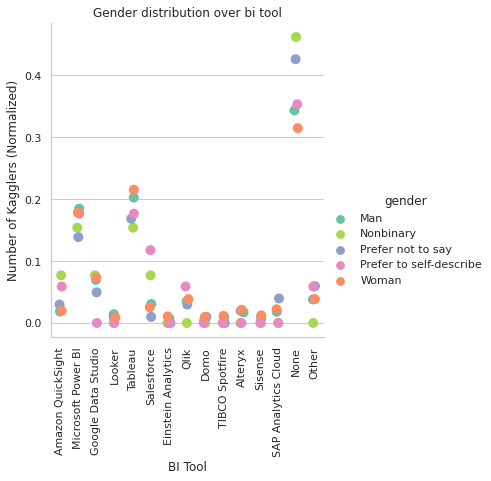

In [136]:
sns.catplot( 
    x = "bi", 
    y ="count",
    hue = "gender", 
    data = df, 
    palette = colors1,
    s = 10,
    jitter = True
)
plt.xlabel("BI Tool")
plt.ylabel("Number of Kagglers (Normalized)")
plt.xticks(rotation = 90)
plt.title("Gender distribution over bi tool")
plt.show()

In [201]:
content(
    "We see that gender groups cluster together in each category of BI Tool. This means that gender groups " +
    "behave in a similar manner. Most participants selected None. Tableau is otherwise most popular."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>We see that gender groups cluster together in each category of BI Tool. This means that gender groups behave in a similar manner. Most participants selected None. Tableau is otherwise most popular.</span></div>

# Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)

In [202]:
content(
    "Let's have a look at the BI Tools that people hope to become familiar with in the next 2 years."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's have a look at the BI Tools that people hope to become familiar with in the next 2 years.</span></div>

In [137]:
bi_cols = [
    'Q31_B_Part_1', 'Q31_B_Part_2', 'Q31_B_Part_3', 'Q31_B_Part_4', 'Q31_B_Part_5', 'Q31_B_Part_6', 
    'Q31_B_Part_7', 'Q31_B_Part_8', 'Q31_B_Part_9', 'Q31_B_Part_10', 'Q31_B_Part_11', 'Q31_B_Part_12',
    'Q31_B_Part_13', 'Q31_B_Part_14', 'Q31_B_OTHER'
]

df = data.loc[1:, ["Q2"] + bi_cols]

bi = [
    "Microsoft Power BI", "Amazon QuickSight", "Google Data Studio", "Looker", "Tableau", "Salesforce",
    "Einstein Analytics", "Qlik", "Domo", "TIBCO Spotfire", "Alteryx", "Sisense", "SAP Analytics Cloud",
    "None", "Other"
]
df.columns = ["gender"] + bi

df[df[bi].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum(), axis = 1)

df.columns.name = "bi"

df = df.unstack().reset_index(name = "count")

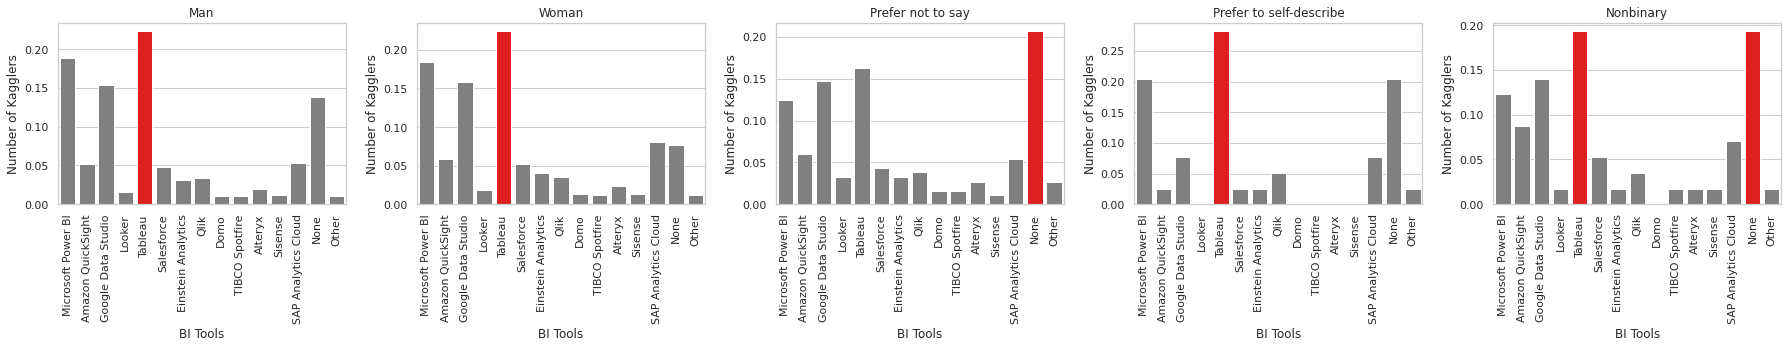

In [138]:
GetRedBar(df, categories, "bi", "BI Tools")

In [204]:
content(
    "Again, Tableau appears to be the favourite. In the case of 'Nonbinary', you may notice a minor deviation."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Again, Tableau appears to be the favourite. In the case of 'Nonbinary', you may notice a minor deviation.</span></div>

# Which of the following business intelligence tools do you use most often?

In [205]:
content(
    "We saw the dominance of Tableau. Should we see anything different this time?"
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>We saw the dominance of Tableau. Should we see anything different this time?</span></div>

In [139]:
df = data.loc[1:, ["Q2", "Q32"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q32": "bi"
})

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)

df["bi"] = pd.Categorical(
    df["bi"],
    categories = set(df["bi"])
)

df = df.groupby(["gender", "bi"]).agg(
    count = pd.NamedAgg("gender", "count")
).reset_index()

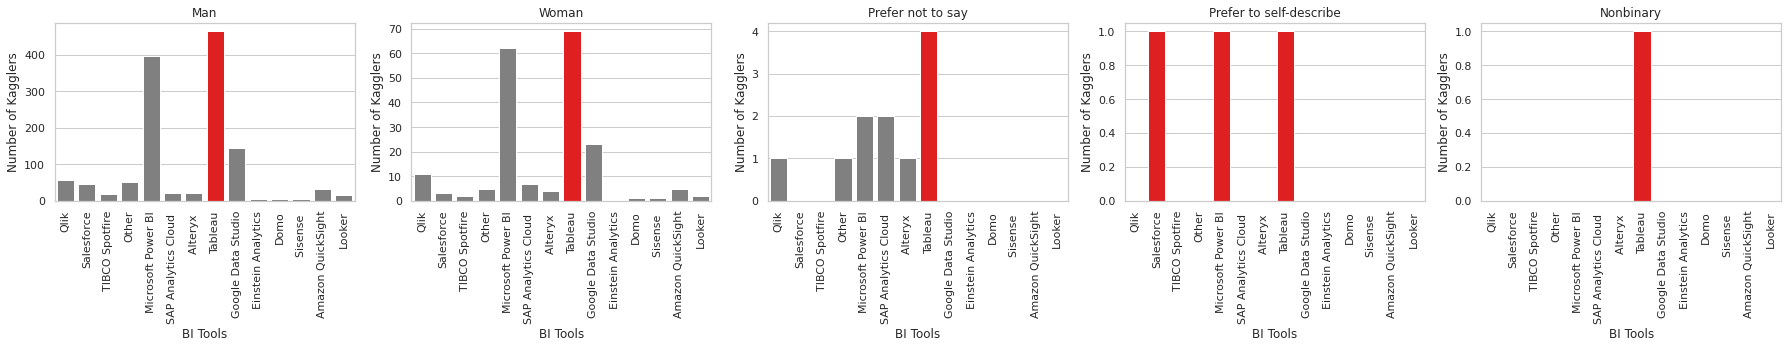

In [140]:
GetRedBar(df, categories, "bi", "BI Tools")

In [206]:
content(
    "We do not see anything different this time. Tableau is the winner. Deviations can be observed in the " +
    "case of 'Prefer to self describe'."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>We do not see anything different this time. Tableau is the winner. Deviations can be observed in the case of 'Prefer to self describe'.</span></div>

# Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply)

In [207]:
content(
    "As Data Science and Machine Learning became popular, people realized that there was a somewhat fixed " +
    "sequence of steps that needed to be followed to get decent if not the best output. For example, the " +
    "analysis process begins with cleaning tasks such as filling in missing values, then processing and " +
    "finally post processing. It was quicky realized that these could be automated in many cases. Thus came " +
    "into existence AutoML."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>As Data Science and Machine Learning became popular, people realized that there was a somewhat fixed sequence of steps that needed to be followed to get decent if not the best output. For example, the analysis process begins with cleaning tasks such as filling in missing values, then processing and finally post processing. It was quicky realized that these could be automated in many cases. Thus came into existence AutoML.</span></div>

In [141]:
automl_cols = [
    'Q33_A_Part_1', 'Q33_A_Part_2', 'Q33_A_Part_3', 'Q33_A_Part_4', 'Q33_A_Part_5', 'Q33_A_Part_6', 
    'Q33_A_Part_7', 'Q33_A_OTHER'
]

df = data.loc[1:, ["Q2"] + automl_cols]

automl = [
    "Augmentation", "Feature engineering / selection", "Model selection", "Model architecture", 
    "Hyperparameter tuning", "ML pipelines", "No / None", "Other"
]
df.columns = ["gender"] + automl

df[df[automl].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum(), axis = 1)

df.columns.name = "automl"
df = df.unstack().reset_index(name = "count")

df = df.sort_values(["gender", "automl"], ignore_index = True)

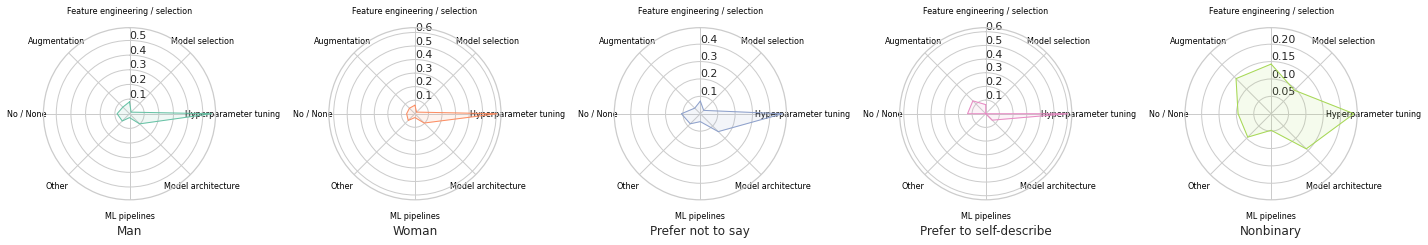

In [142]:
cat = set(df["automl"])
N = len(cat)

f, ax = plt.subplots()
f.set_figheight(20)
f.set_figwidth(20)
for i, c in enumerate(categories):
    temp = df[df["gender"] == c]
    values = list(temp["count"])
    values += [values[0]]
 
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += [angles[0]]
 
    ax = plt.subplot(1, len(categories), i+1, polar=True)
    plt.xticks(angles[:-1], cat, color='black', size=8)
    plt.xlabel(c)
    ax.set_rlabel_position(0)
    ax.plot(angles, values, linewidth=1, linestyle='solid', color = palette[i])
    ax.fill(angles, values, color = palette[i], alpha=0.1)
    ax.set_theta_offset(np.deg2rad(90))
    
plt.tight_layout()

In [208]:
content(
    "With the exception of 'Nonbinary' group, the trend is somewhat similar. Most use AutoML for " +
    "Hyperparameter Tuning. In the case of  'Nonbinary' group, people seem to use other tools relatively more."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>With the exception of 'Nonbinary' group, the trend is somewhat similar. Most use AutoML for Hyperparameter Tuning. In the case of  'Nonbinary' group, people seem to use other tools relatively more.</span></div>

# Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply)

In [209]:
content(
    "While certain tasks can be fully automated. Many tasks that we seem to automate can only be partially " +
    "automated. That said, let's have a look at partial AutoML tools."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>While certain tasks can be fully automated. Many tasks that we seem to automate can only be partially automated. That said, let's have a look at partial AutoML tools.</span></div>

In [143]:
automl_cols = [
    'Q33_B_Part_1', 'Q33_B_Part_2', 'Q33_B_Part_3', 'Q33_B_Part_4', 'Q33_B_Part_5', 'Q33_B_Part_6',
    'Q33_B_Part_7', 'Q33_B_OTHER'
]

df = data.loc[1:, ["Q2"] + automl_cols]

df.columns = ["gender"] + automl

df[df[automl].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum(), axis = 1)

df.columns.name = "automl"

df = df.unstack().reset_index(name = "count")

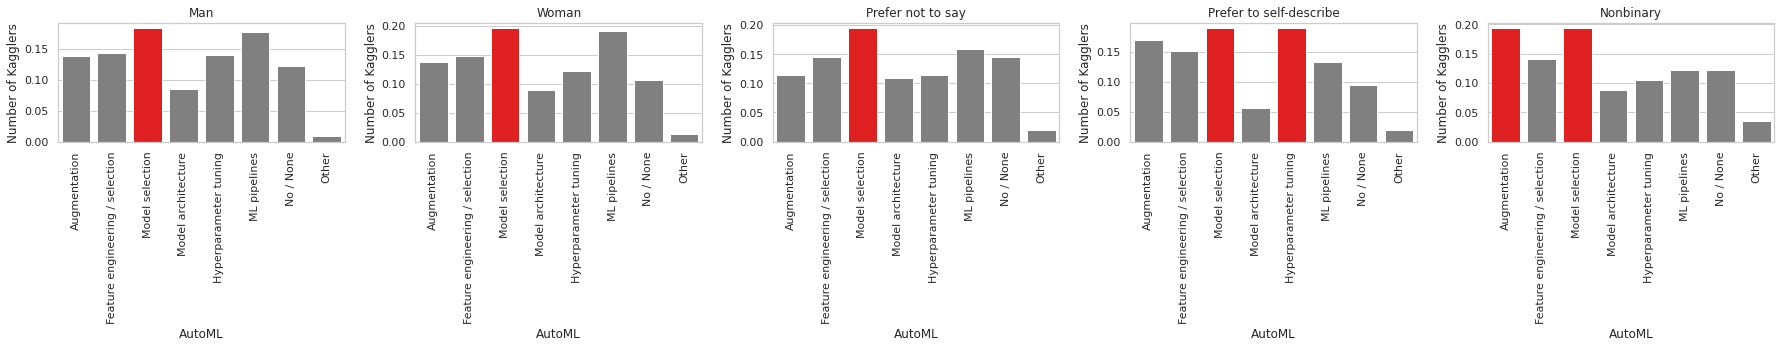

In [144]:
GetRedBar(df, categories, "automl", "AutoML")

In [210]:
content(
    "Itterspective of gendr, Model Selection seems to be the favourite. Minor deviations can be observed " +
    "in the case of 'Prefer to self describe' and 'Nonbinary' categories."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Itterspective of gendr, Model Selection seems to be the favourite. Minor deviations can be observed in the case of 'Prefer to self describe' and 'Nonbinary' categories.</span></div>

# Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)

In [211]:
content(
    "Let's have a look at which automated machine learning tools are used by people on a regular basis."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's have a look at which automated machine learning tools are used by people on a regular basis.</span></div>

In [145]:
automl_cols = [
    'Q34_A_Part_1', 'Q34_A_Part_2', 'Q34_A_Part_3', 'Q34_A_Part_4', 'Q34_A_Part_5', 'Q34_A_Part_6', 
    'Q34_A_Part_7', 'Q34_A_Part_8', 'Q34_A_Part_9', 'Q34_A_Part_10', 'Q34_A_Part_11', 'Q34_A_OTHER'
]

df = data.loc[1:, ["Q2"] + automl_cols]

automl = [
    "Google Cloud AutoML", "H20 Driverless AI", "Databricks AutoML", "DataRobot AutoML", "Tpot", "Auto-Keras",
    "Auto-Sklearn", "Auto_ml", "Xcessiv", "MLbox", "No / None", "Other"
]
df.columns = ["gender"] + automl

df[df[automl].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum()*100, axis = 1)

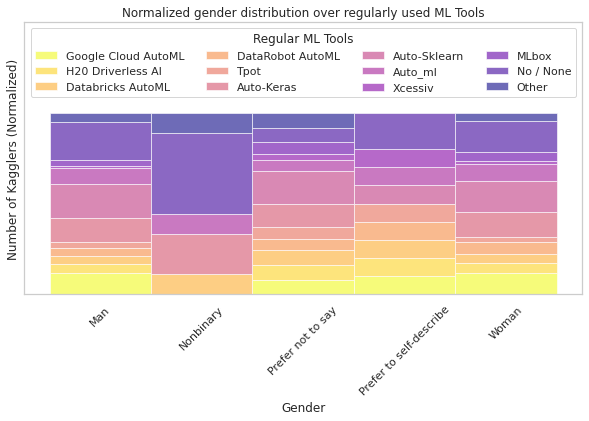

In [146]:
df.plot(
    kind = "bar",
    stacked = True,
    figsize = (10, 5),
    colormap = "plasma_r",
    width = 1,
    alpha = 0.6
)
plt.ylim(0, 150)
plt.xticks(rotation = 45)
plt.yticks([])
plt.xlabel("Gender")
plt.ylabel("Number of Kagglers (Normalized)")
plt.title("Normalized gender distribution over regularly used ML Tools")
plt.legend(ncol = 4, loc = "upper center", title = "Regular ML Tools")

ax = plt.gca()
ax.grid(False)

In [212]:
content(
    "With the exception of 'Nonbinary', the gender groups appear to have a similar usage pattern." 
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>With the exception of 'Nonbinary', the gender groups appear to have a similar usage pattern.</span></div>

# Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply)

In [213]:
content(
    "Let's now see which automated machine learning tools do people hope to become familiar with in the " +
    "next 2 years."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's now see which automated machine learning tools do people hope to become familiar with in the next 2 years.</span></div>

In [147]:
automl_cols = [
    'Q34_B_Part_1', 'Q34_B_Part_2', 'Q34_B_Part_3', 'Q34_B_Part_4', 'Q34_B_Part_5', 'Q34_B_Part_6', 
    'Q34_B_Part_7', 'Q34_B_Part_8', 'Q34_B_Part_9', 'Q34_B_Part_10', 'Q34_B_Part_11', 'Q34_B_OTHER'
]

df = data.loc[1:, ["Q2"] + automl_cols]

df.columns = ["gender"] + automl

df[df[automl].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum(), axis = 1)

df.columns.name = "automl"
df = df.unstack().reset_index(name = "count")

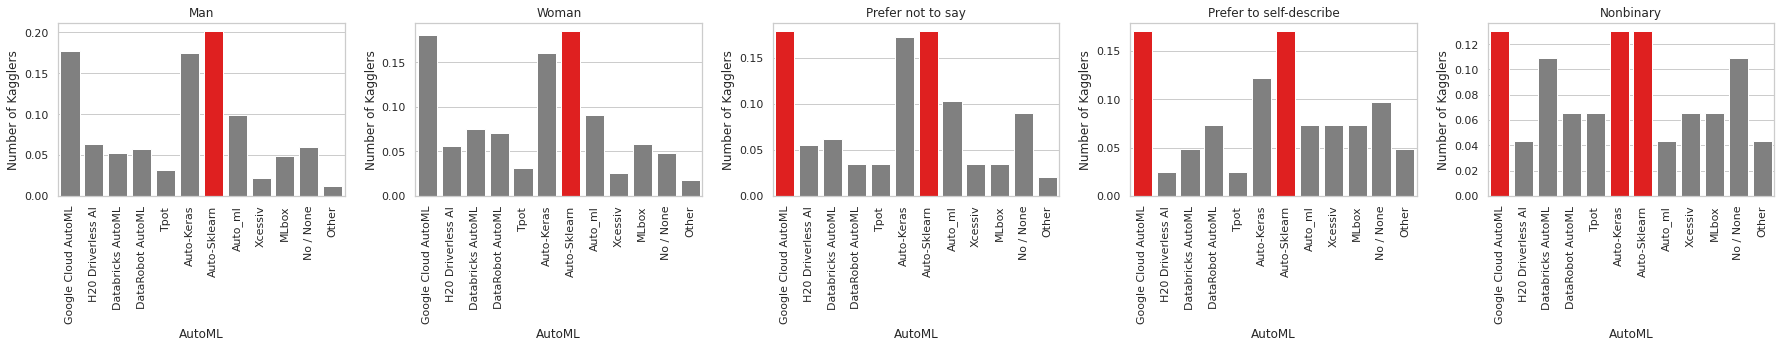

In [148]:
GetRedBar(df, categories, "automl", "AutoML")

In [215]:
content(
    "Auto-sklearn is unsurprisingly the favourite. 'prefer not to say', 'Prefer to self describe' and " +
    "'Nonbinary' groups also have a liking for other tools such as Google Cloud AutoML. Liking for Google " +
    "products is evident in other groups as well. Even previously we saw how popular Google Cloud is."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Auto-sklearn is unsurprisingly the favourite. 'prefer not to say', 'Prefer to self describe' and 'Nonbinary' groups also have a liking for other tools such as Google Cloud AutoML. Liking for Google products is evident in other groups as well. Even previously we saw how popular Google Cloud is.</span></div>

# Do you use any tools to help manage machine learning experiments? (Select all that apply)

In [216]:
content(
    "Managing Machine Learning Experiments is critical for Data Scientists and Machine Learning Engineers. " +
    "Let's explore the tools people use to manage ML experiments."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Managing Machine Learning Experiments is critical for Data Scientists and Machine Learning Engineers. Let's explore the tools people use to manage ML experiments.</span></div>

In [149]:
exp_cols = [
    'Q35_A_Part_1', 'Q35_A_Part_2', 'Q35_A_Part_3', 'Q35_A_Part_4', 'Q35_A_Part_5', 'Q35_A_Part_6', 
    'Q35_A_Part_7', 'Q35_A_Part_8', 'Q35_A_Part_9', 'Q35_A_Part_10', 'Q35_A_OTHER'
]

df = data.loc[1:, ["Q2"] + exp_cols]

exp = [
    "Neptune.ai", "Weights & Biases", "Comet.ml", "Sacred + Omniboard", "TensorBoard", "Guild.ai", "Polyaxon",
    "Trains", "Domino Model Monitor", "No / None", "Other"
]
df.columns = ["gender"] + exp

df[df[exp].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum()*100, axis = 1)

df.columns.name = "Manage ML Experiments"
df = df.unstack().reset_index(name = "count")

df = df.sort_values(["gender", "Manage ML Experiments"])

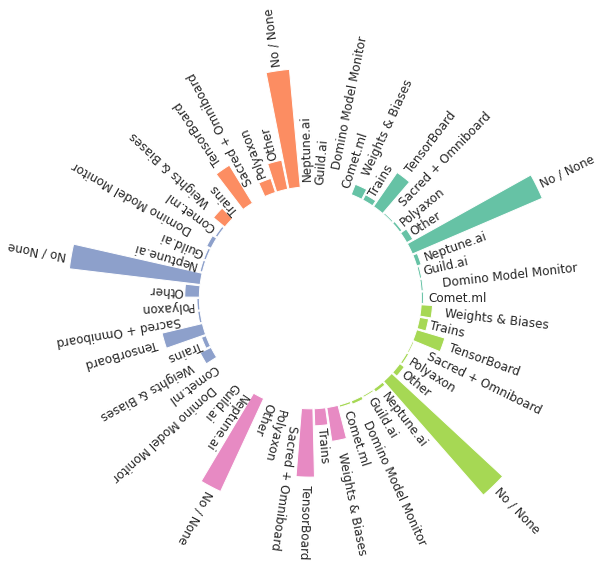

In [150]:
col = [(t,)*len(exp) for t in palette]
col = list(itertools.chain(*col)) 

lObjectsALLcnts = df["count"]

lObjectsALLlbls = df["Manage ML Experiments"]

iN = len(lObjectsALLcnts)
arrCnts = np.array(lObjectsALLcnts)

theta=np.arange(0,2*np.pi,2*np.pi/iN)
width = (2*np.pi)/iN *0.9
bottom = 50

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
bars = ax.bar(theta, arrCnts, width=width, bottom=bottom, color=col)

plt.axis('off')

rotations = np.rad2deg(theta)
y0,y1 = ax.get_ylim()

for x, bar, rotation, label in zip(theta, bars, rotations, lObjectsALLlbls):
    offset = (bottom+bar.get_height())/(y1-y0)
    lab = ax.text(0, 0, label, transform=None, ha='center', va='center')
    renderer = ax.figure.canvas.get_renderer()
    bbox = lab.get_window_extent(renderer=renderer)
    invb = ax.transData.inverted().transform([[0,0],[bbox.width,0] ])
    lab.set_position((x,offset+(invb[1][0]-invb[0][0])/2.*2.7 ) )
    lab.set_transform(ax.get_xaxis_transform())
    lab.set_rotation(rotation)
    
plt.show()

In [217]:
content(
    "Irrespective of gender, most people selected 'None'. Amongst the tools used, TensorBoard is the most " +
    "popular choice irrespective of gender."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Irrespective of gender, most people selected 'None'. Amongst the tools used, TensorBoard is the most popular choice irrespective of gender.</span></div>

# In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)

In [218]:
content(
    "Let's now see which tools people hope to become familiar with in the following years."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's now see which tools people hope to become familiar with in the following years.</span></div>

In [151]:
exp_cols = [
    'Q35_B_Part_1', 'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5', 'Q35_B_Part_6', 
    'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9', 'Q35_B_Part_10', 'Q35_B_OTHER'
]

df = data.loc[1:, ["Q2"] + exp_cols]

df.columns = ["gender"] + exp

df[df[exp].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum(), axis = 1)

df.columns.name = "exp"
df = df.unstack().reset_index(name = "count")

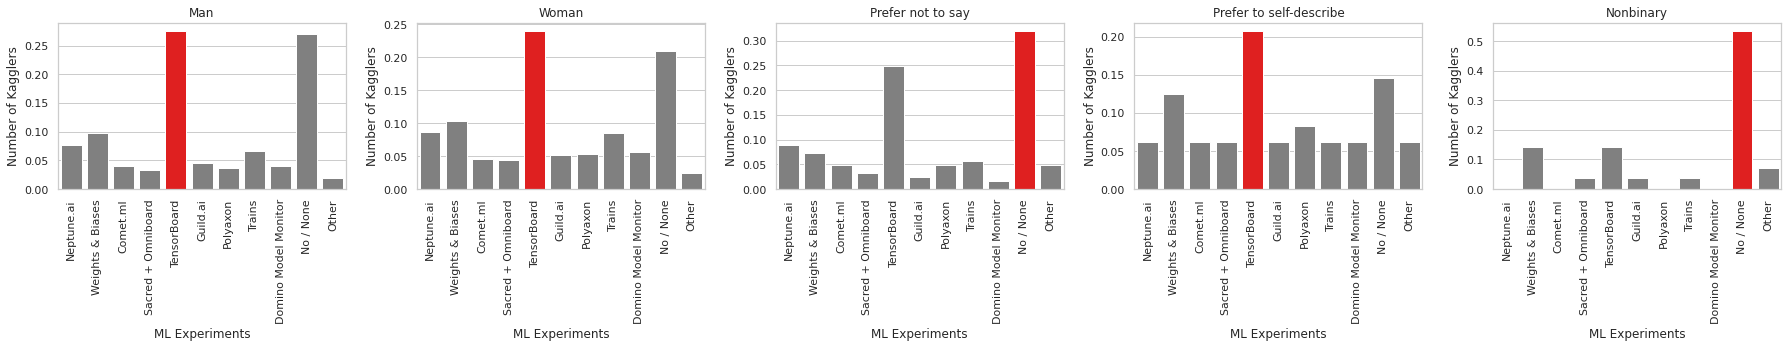

In [152]:
GetRedBar(df, categories, "exp", "ML Experiments")

In [219]:
content(
    "While 'Man', 'Woman' and 'Prefer to self describe' intend to learn TensorBoard, most people belonging " +
    "to 'Prefer to self describe' and 'Nonbinary' groups selected 'None'. TensorBoard was however the " +
    "second most popular choice of these two groups."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>While 'Man', 'Woman' and 'Prefer to self describe' intend to learn TensorBoard, most people belonging to 'Prefer to self describe' and 'Nonbinary' groups selected 'None'. TensorBoard was however the second most popular choice of these two groups.</span></div>

# Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)

In [220]:
content(
    "It is important to understand the deployment side of the Machine Learning pipeline because " +
    "without deployment, ML products or projects become inaccessible to the world. It is only through " +
    "open-source and code sharing that most great projects have come into being."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>It is important to understand the deployment side of the Machine Learning pipeline because without deployment, ML products or projects become inaccessible to the world. It is only through open-source and code sharing that most great projects have come into being.</span></div>

In [153]:
share_cols = [
    'Q36_Part_1', 'Q36_Part_2', 'Q36_Part_3', 'Q36_Part_4', 'Q36_Part_5', 'Q36_Part_6', 'Q36_Part_7', 
    'Q36_Part_8', 'Q36_Part_9', 'Q36_OTHER'
]

df = data.loc[1:, ["Q2"] + share_cols]

share = [
    "Plotly Dash", "Streamlit", "NBViewer", "GitHub", "Personal blog", "Kaggle", "Colab", "Shiny", "None",
    "Other"
]
df.columns = ["gender"] + share

df[df[share].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum()*2000, axis = 1)

df.columns.name = "share"
df = df.unstack().reset_index(name = "count")

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)

df = df.sort_values(["gender", "share"], ignore_index = True)

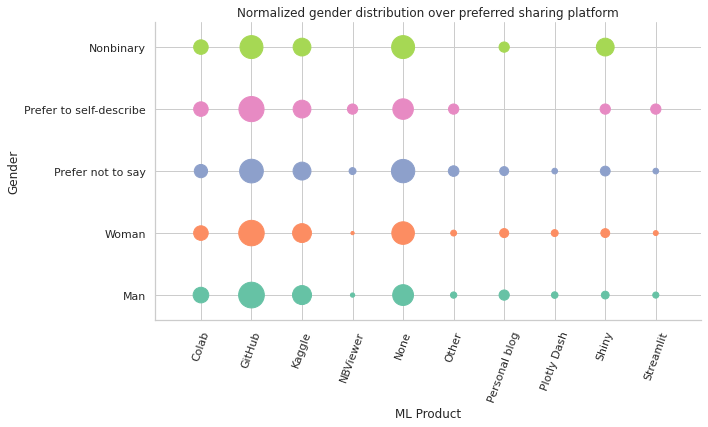

In [154]:
fg = sns.FacetGrid(
    data = df, 
    hue = 'gender',
    hue_order = categories,
    palette = "Set2", 
    height = 5, 
    aspect = 2
)
fg.map(plt.scatter, "share", "gender", "count")
plt.margins(0.1)
plt.xlabel("ML Product")
plt.ylabel("Gender")
plt.xticks(rotation = 70)
plt.title("Normalized gender distribution over preferred sharing platform")
plt.show()

In [221]:
content(
    "The patterns are quite similar across the gender categories. Most prefer GitHub. The second most " +
    "common choice was None. Other options weren't too common."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>The patterns are quite similar across the gender categories. Most prefer GitHub. The second most common choice was None. Other options weren't too common.</span></div>

# On which platforms have you begun or completed data science courses? (Select all that apply)

In [222]:
content(
    "To be in Data Science and Machine Learning, you must learn Data Science and Machine Learning. Let's " +
    "discover where most people prefer to do courses."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>To be in Data Science and Machine Learning, you must learn Data Science and Machine Learning. Let's discover where most people prefer to do courses.</span></div>

In [155]:
course_cols = [
    'Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3', 'Q37_Part_4', 'Q37_Part_5', 'Q37_Part_6', 'Q37_Part_7', 
    'Q37_Part_8', 'Q37_Part_9', 'Q37_Part_10', 'Q37_Part_11', 'Q37_OTHER'
]

df = data.loc[1:, ["Q2"] + course_cols]

course = [
    "Coursera", "edX", "Kaggle", "DataCamp", "Fast.ai", "Udacity", "Udemy", "LinkedIn", "Cloud-certification",
    "University", "None", "Other"
]
df.columns = ["gender"] + course

df[df[course].notnull()] = 1
df = df.fillna(0)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum()*100, axis = 1)

df.columns.name = "course"
df = df.unstack().reset_index(name = "count")

df = df.sort_values(["gender", "course"], ignore_index = True)

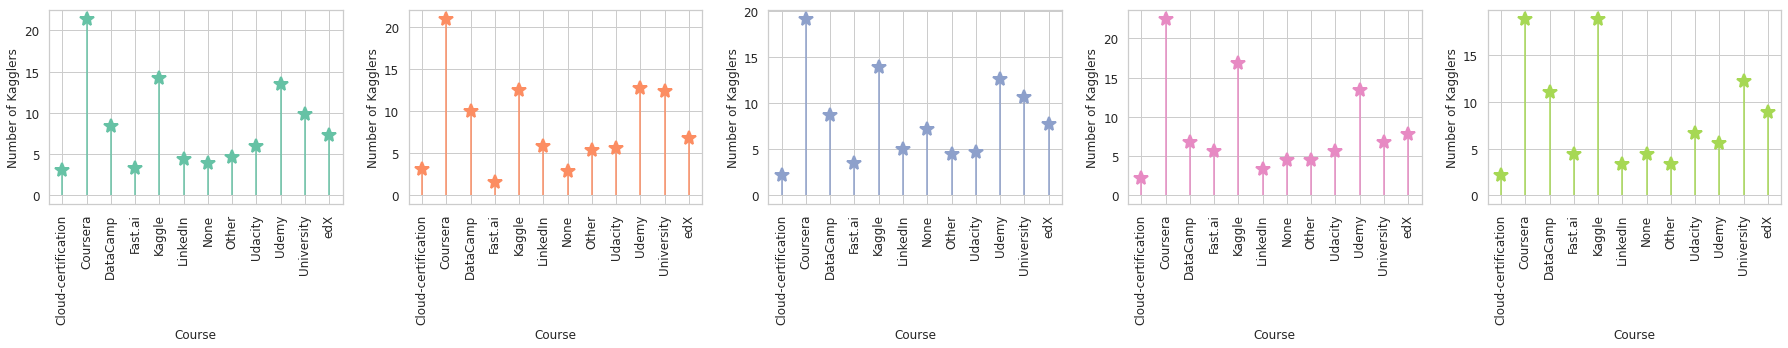

In [156]:
plt.subplots(figsize = (25, 5))
for i, c in enumerate(categories):
    plt.subplot(1, 5, i+1)
    (markerline, stemlines, baseline) = plt.stem(
        df[df["gender"] == c]["course"].values,
        df[df["gender"] == c]["count"].values, 
    )
    plt.setp(
        markerline, 
        marker = '*', 
        markersize = 15,
        markeredgewidth = 2, 
        color = palette[i]
    )
    plt.setp(stemlines, color = palette[i])
    plt.setp(baseline, visible = False)
    plt.tick_params(labelsize = 12)
    plt.xticks(rotation = 90)
    
    plt.xlabel("Course")
    plt.ylabel("Number of Kagglers")
    
plt.tight_layout()

In [223]:
content(
    "The patterns are fairly consistent across 5 gender categories. They all prefer Coursera most. Kaggle " +
    "and Udemy are other popular options."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>The patterns are fairly consistent across 5 gender categories. They all prefer Coursera most. Kaggle and Udemy are other popular options.</span></div>

# What is the primary tool that you use at work or school to analyze data? (Include text response)

In [224]:
content(
    "Let's see which tools people subscribing to different gender identities prefer to use to analyze data."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's see which tools people subscribing to different gender identities prefer to use to analyze data.</span></div>

In [157]:
df = data.loc[1:, ["Q2", "Q38"]].dropna().reset_index(drop = True)

df = df.rename(columns = {
    "Q2": "gender",
    "Q38": "analysis"
})

df["analysis"] = df["analysis"].replace({
    'Advanced statistical software (SPSS, SAS, etc.)': "Advanced Statistics Software",
    'Basic statistical software (Microsoft Excel, Google Sheets, etc.)': "Basic Statistics Software",
    'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)': "BI Software",
    'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)': "Cloud based software",
    'Local development environments (RStudio, JupyterLab, etc.)': "Local Softwares",
})

df = df.groupby(["gender", "analysis"]).agg(
    count = pd.NamedAgg("gender", "count")
).reset_index()

df["normal_gender_count"] = df.groupby(["gender"])["count"].transform(lambda x: x/x.sum() * 100)

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)

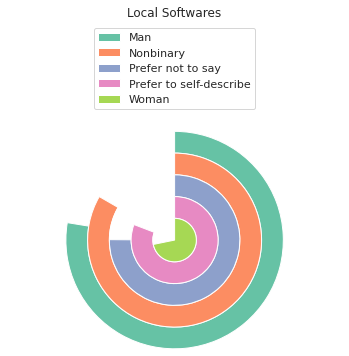

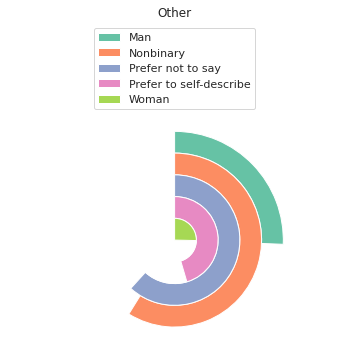

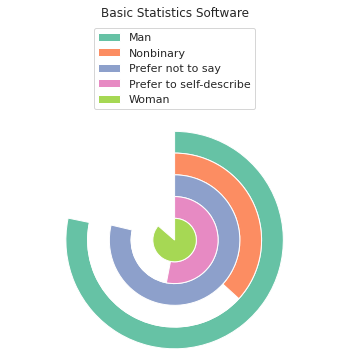

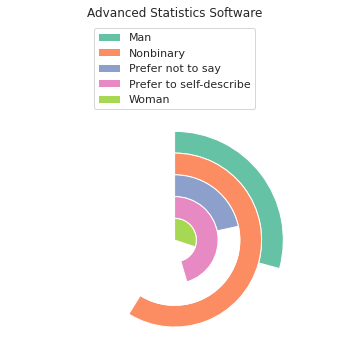

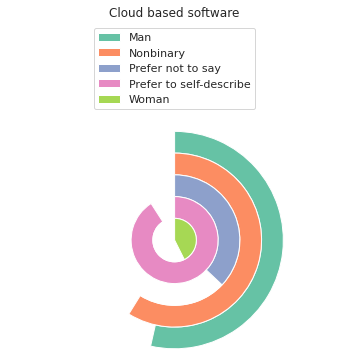

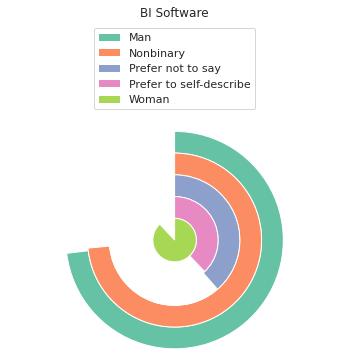

In [158]:
for c in set(df["analysis"]):
    temp = df[df["analysis"] == c]

    labels = list(temp["gender"])
    values = list(temp["normal_gender_count"])
    
    #number of data points
    n = len(values)
    #find max value for full ring
    k = 10 ** int(log10(max(values)))
    m = k * (1 + max(values) // k)

    #radius of donut chart
    r = 1.5
    #calculate width of each ring
    w = r / n 

    #create figure, axis
    fig, ax = plt.subplots()
    ax.axis("equal")

    #create rings of donut chart
    for i in range(n):
        #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
        innerring, _ = ax.pie(
            [m - values[i], values[i]], 
            radius = r - i * w, 
            startangle = 90, 
            labels = ["", labels[i]], 
            labeldistance = 1 - 1 / (1.5 * (n - i)), 
            textprops = {"alpha": 0}, 
            colors = ["white", palette[i]]
        )
        plt.setp(innerring, width = w, edgecolor = "white")

    plt.legend(loc = "upper center")
    plt.title(c)
    plt.ylim(0, 3)
    plt.show()

In [225]:
content(
    "Local software appear to be the most common choice across the gender groups. Other patterns are not " +
    "so apparent. Different gender groups seem to like different products to different degrees."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Local software appear to be the most common choice across the gender groups. Other patterns are not so apparent. Different gender groups seem to like different products to different degrees.</span></div>

# Who/what are your favorite media sources that report on data science topics? (Select all that apply)

In [226]:
content(
    "To remain updated with the latest developments in Data Science and Machine Learning, it is important " +
    "find a good source of reliable information. Let's see which media sources people use to learn more " +
    "about Data Science and Machine Learning topics."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>To remain updated with the latest developments in Data Science and Machine Learning, it is important find a good source of reliable information. Let's see which media sources people use to learn more about Data Science and Machine Learning topics.</span></div>

In [246]:
media_cols = [
    'Q39_Part_1', 'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5', 'Q39_Part_6', 'Q39_Part_7', 
    'Q39_Part_8', 'Q39_Part_9', 'Q39_Part_10', 'Q39_Part_11', 'Q39_OTHER'
]

df = data.loc[1:, ["Q2"] + media_cols]

media = [
    "Twitter", "Email newsletters", "Reddit", "Kaggle", "Course Forums", "YouTube", "Podcasts", "Blogs",
    "Journal Publications", "Slack Communities", "None", "Other"
]
df.columns = ["gender"] + media

df[df[media].notnull()] = 1
df = df.fillna(0)

df["gender"] = pd.Categorical(
    df["gender"],
    categories = categories,
    ordered = True
)
    
df = df.groupby(["gender"]).sum()
    
df = df.apply(lambda x: x/x.sum(), axis = 1)
df.columns.name = "media"

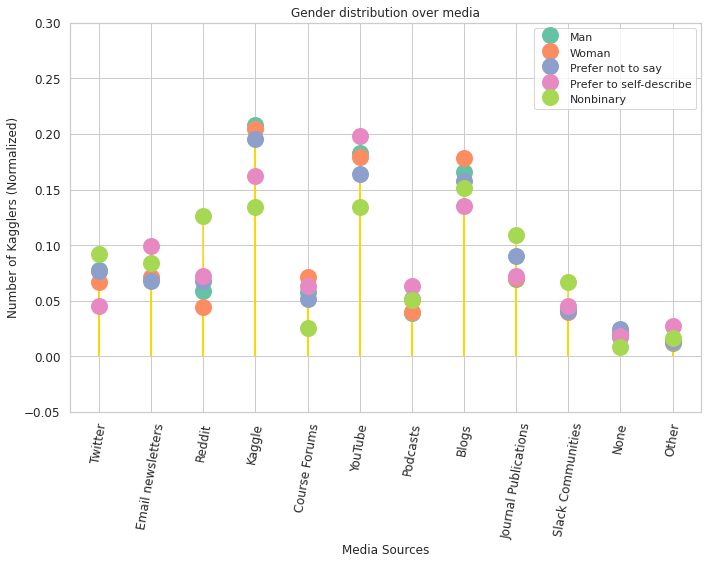

In [247]:
plt.figure(figsize = (10, 8))
for i, c in enumerate(categories):
    (markerline, stemlines, baseline) = plt.stem(
        df.columns,
        df.loc[c]
    )
    plt.setp(
        markerline, 
        marker = 'o', 
        markersize = 15,
        markeredgewidth = 2, 
        color = palette[i]
    )
    plt.setp(stemlines, color = "gold")
    plt.setp(baseline, visible = False)
    plt.tick_params(labelsize = 12)
    plt.xticks(rotation = 80)
    plt.ylim(-0.05, 0.3)
    
    plt.xlabel("Media Sources")
    plt.ylabel("Number of Kagglers (Normalized)")
    
    plt.legend(categories)
    plt.title("Gender distribution over media")
    
plt.tight_layout()

In [227]:
content(
    "We observe a regular pattern across the gender groups. They cluster together for each category. This " +
    "demonstrates how similar gender groups are in the choices they make. Most learn new things directly " +
    "on Kaggle. YouTube and Blogs are other popular options."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>We observe a regular pattern across the gender groups. They cluster together for each category. This demonstrates how similar gender groups are in the choices they make. Most learn new things directly on Kaggle. YouTube and Blogs are other popular options.</span></div>

# Conclusion

In [236]:
content(
    "Let's ask ourselves the same question we started off with - How does gender influence the decisions " + 
    "the Data Science and Machine Learning community makes? What do you think is the answer? I believe " +
    "that gender does affect the choice people make, but only a little bit. That little bit makes all the " +
    "difference in defining who we are. But the big picture is that we all are the same. :D" + "\n\n" +
    "If you like my work or if you learned something new, consider giving me an UPVOTE. Thanks a lot."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Let's ask ourselves the same question we started off with - How does gender influence the decisions the Data Science and Machine Learning community makes? What do you think is the answer? I believe that gender does affect the choice people make, but only a little bit. That little bit makes all the difference in defining who we are. But the big picture is that we all are the same. :D

If you like my work or if you learned something new, consider giving me an UPVOTE. Thanks a lot.</span></div>

In [238]:
content(
    "Credits - Sharlto Cope and Harveen Singh Chadha. I learnt quite a lot from their notebooks."
)

<div style= 'background-color:rgb(247, 247, 247); border:1px solid rgb(207,207,207); border-color:rgb(107,107,107); padding: 10px'>     <span style='color: black;  font-family: medium-content-serif-font, Georgia, Cambria, 'Times New Roman', Times, serif;     font-weight: 400; letter-spacing: -0.004em; line-height: 1.58; '>Credits - Sharlto Cope and Harveen Singh Chadha. I learnt quite a lot from their notebooks.</span></div>